# Feature engineering and Preprocessing

In [283]:
# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [284]:
# Set the max rows and columns for Pandas
pd.options.display.max_columns = 100
pd.options.display.max_rows = 200

In [285]:
# Import graph style
plt.style.use('fivethirtyeight')

In [286]:
clean_train_df = pd.read_csv('../datasets/clean_train_df.csv')

In [1]:
def corr_heatmap(dataframe, label='test', cmap='coolwarm'):
    mask = np.zeros_like(dataframe.corr())
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(25,20))

    sns.heatmap(dataframe.corr(), annot=True, mask=mask, cmap=cmap, annot_kws={'fontsize':14})
    plt.title('Correlation of features of ' + label + ' variables')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

In [2]:
def add_underscore_char(words,add_prefix=''):
    '''
    This function will covert the strings to lower case and add the prefix names to the column
    '''
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
                new_dict[word] = add_prefix+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
# add_underscore_char(train_df_num.columns, '2018_')

In [3]:
def single_corr_heatmap(dataframe, feature, colormap='icefire'):
    df_corr = pd.DataFrame(dataframe.corr()[feature]).sort_values(feature, ascending=False)
    plt.figure(figsize=(11,7))
    sns.heatmap(df_corr, cmap=colormap, annot=True)
    if len(feature) > 1:
        plt.title('Correlation of numeric features with ' + ", ".join(feature), fontsize=15, pad=15)
    else:
        plt.title('Correlation of numeric features with ' + "".join(feature), fontsize=15, pad=15)
    plt.xlabel('')
    plt.ylabel('')

# single_corr_heatmap(train_df_with_0, ['SalePrice'])

In [290]:
# Obtain the House Age variable as it may be correlated with the sale price
clean_train_df['house_age']  =clean_train_df['yr_sold'] - clean_train_df['year_built']
clean_train_df

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,sale_type,saleprice,house_age
0,2story_1946_&_newer,RL,69.06,13517.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725.0,754.0,1479.0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976,RFn,2,475.0,TA,TA,Y,0.0,44.0,3,2010,WD,11.779129,34
1,2story_1946_&_newer,RL,43.00,11492.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913.0,1209.0,2122.0,1,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559.0,TA,TA,Y,0.0,74.0,4,2009,WD,12.301383,13
2,1story_1946_&_newer_all_styles,RL,68.00,7922.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057.0,0.0,1057.0,1,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953,Unf,1,246.0,TA,TA,Y,0.0,52.0,1,2010,WD,11.599103,57
3,2story_1946_&_newer,RL,73.00,9802.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744.0,700.0,1444.0,0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007,Fin,2,400.0,TA,TA,Y,100.0,0.0,4,2010,WD,12.066811,4
4,11/2_story_finished_all_ages,RL,82.00,14235.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831.0,614.0,1445.0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957,Unf,2,484.0,TA,TA,N,0.0,59.0,3,2010,WD,11.838626,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1story_1946_&_newer_all_styles,RL,79.00,11449.0,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,1884.0,GasA,Ex,Y,SBrkr,1728.0,0.0,1728.0,1,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007,Fin,2,520.0,TA,TA,Y,0.0,276.0,1,2008,WD,12.607366,1
1896,1story_1945_&_older,RL,69.06,12342.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,861.0,GasA,Ex,Y,SBrkr,861.0,0.0,861.0,0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961,Unf,2,539.0,TA,TA,Y,158.0,0.0,3,2009,WD,11.320554,69
1897,11/2_story_finished_all_ages,RL,57.00,7558.0,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,896.0,GasA,Gd,Y,SBrkr,1172.0,741.0,1913.0,0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929,Unf,2,342.0,Fa,Fa,Y,0.0,0.0,3,2009,WD,12.083905,81
1898,1story_1946_&_newer_all_styles,RL,80.00,10400.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,1200.0,GasA,TA,Y,SBrkr,1200.0,0.0,1200.0,1,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1956,Unf,1,294.0,TA,TA,Y,0.0,189.0,11,2009,WD,11.877569,53


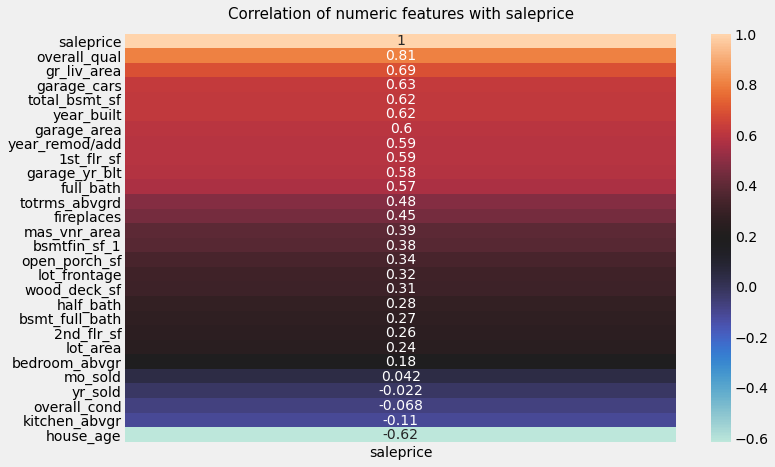

In [291]:
single_corr_heatmap(clean_train_df,['saleprice'])

`house_age` shows a negative correlation with saleprice. This will be helpful.

In [292]:
# Create a function to combine relevant features together for feature engineering
def combine_features(dataframe, list_of_features):
    '''
    Function that combines 2 features
    '''
    feature_name = "*".join(list_of_features)
    f1, f2 = list_of_features
    dataframe[feature_name] = dataframe[f1] * dataframe[f2]
    return dataframe

In [293]:
# Combine both garage cars and garage_yr_blt 
combine_features(clean_train_df, ['garage_cars', 'garage_yr_blt'])

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,sale_type,saleprice,house_age,garage_cars*garage_yr_blt
0,2story_1946_&_newer,RL,69.06,13517.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725.0,754.0,1479.0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976,RFn,2,475.0,TA,TA,Y,0.0,44.0,3,2010,WD,11.779129,34,3952
1,2story_1946_&_newer,RL,43.00,11492.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913.0,1209.0,2122.0,1,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997,RFn,2,559.0,TA,TA,Y,0.0,74.0,4,2009,WD,12.301383,13,3994
2,1story_1946_&_newer_all_styles,RL,68.00,7922.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057.0,0.0,1057.0,1,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953,Unf,1,246.0,TA,TA,Y,0.0,52.0,1,2010,WD,11.599103,57,1953
3,2story_1946_&_newer,RL,73.00,9802.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744.0,700.0,1444.0,0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007,Fin,2,400.0,TA,TA,Y,100.0,0.0,4,2010,WD,12.066811,4,4014
4,11/2_story_finished_all_ages,RL,82.00,14235.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831.0,614.0,1445.0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957,Unf,2,484.0,TA,TA,N,0.0,59.0,3,2010,WD,11.838626,110,3914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1story_1946_&_newer_all_styles,RL,79.00,11449.0,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,1884.0,GasA,Ex,Y,SBrkr,1728.0,0.0,1728.0,1,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007,Fin,2,520.0,TA,TA,Y,0.0,276.0,1,2008,WD,12.607366,1,4014
1896,1story_1945_&_older,RL,69.06,12342.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,861.0,GasA,Ex,Y,SBrkr,861.0,0.0,861.0,0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961,Unf,2,539.0,TA,TA,Y,158.0,0.0,3,2009,WD,11.320554,69,3922
1897,11/2_story_finished_all_ages,RL,57.00,7558.0,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,896.0,GasA,Gd,Y,SBrkr,1172.0,741.0,1913.0,0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929,Unf,2,342.0,Fa,Fa,Y,0.0,0.0,3,2009,WD,12.083905,81,3858
1898,1story_1946_&_newer_all_styles,RL,80.00,10400.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,1200.0,GasA,TA,Y,SBrkr,1200.0,0.0,1200.0,1,1,0,3,1,TA,6,Typ,2,Gd,Attchd,1956

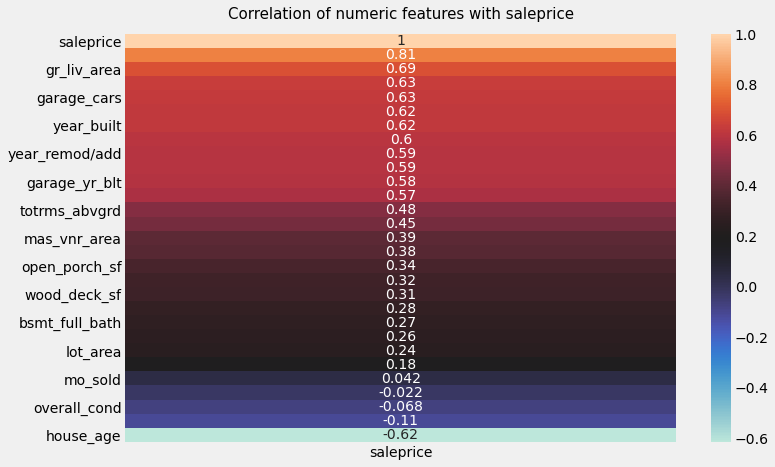

In [294]:
single_corr_heatmap(clean_train_df,['saleprice'])

`garage_cars*garage_yr_blt` have a better correlation compared to `garage_cars` and `garage_yr_blt`. Will drop both.

In [295]:
# Drop both garage_cars and garage_yr_blt
clean_train_df.drop(['garage_cars', 'garage_yr_blt'], axis=1, inplace=True)

In [296]:
# Try combining full_bath and half_bath
combine_features(clean_train_df, ['full_bath', 'half_bath'])

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,sale_type,saleprice,house_age,garage_cars*garage_yr_blt,full_bath*half_bath
0,2story_1946_&_newer,RL,69.06,13517.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725.0,754.0,1479.0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,475.0,TA,TA,Y,0.0,44.0,3,2010,WD,11.779129,34,3952,2
1,2story_1946_&_newer,RL,43.00,11492.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913.0,1209.0,2122.0,1,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,559.0,TA,TA,Y,0.0,74.0,4,2009,WD,12.301383,13,3994,2
2,1story_1946_&_newer_all_styles,RL,68.00,7922.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057.0,0.0,1057.0,1,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,246.0,TA,TA,Y,0.0,52.0,1,2010,WD,11.599103,57,1953,0
3,2story_1946_&_newer,RL,73.00,9802.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744.0,700.0,1444.0,0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,400.0,TA,TA,Y,100.0,0.0,4,2010,WD,12.066811,4,4014,2
4,11/2_story_finished_all_ages,RL,82.00,14235.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831.0,614.0,1445.0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,484.0,TA,TA,N,0.0,59.0,3,2010,WD,11.838626,110,3914,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1story_1946_&_newer_all_styles,RL,79.00,11449.0,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,1884.0,GasA,Ex,Y,SBrkr,1728.0,0.0,1728.0,1,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,520.0,TA,TA,Y,0.0,276.0,1,2008,WD,12.607366,1,4014,0
1896,1story_1945_&_older,RL,69.06,12342.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,861.0,GasA,Ex,Y,SBrkr,861.0,0.0,861.0,0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,Unf,539.0,TA,TA,Y,158.0,0.0,3,2009,WD,11.320554,69,3922,0
1897,11/2_story_finished_all_ages,RL,57.00,7558.0,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,896.0,GasA,Gd,Y,SBrkr,1172.0,741.0,1913.0,0,1,1,3,1,TA,9,Typ,1,TA,Detchd,Unf,342.0,Fa,Fa,Y,0.0,0.0,3,2009,WD,12.083905,81,3858,1
1898,1story_1946_&_newer_all_styles,RL,80.00,10400.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,1200.0,GasA,TA,Y,SBrkr,1200.0,0.0,1200.0,1,1,0,3,1,TA,6,Typ,2,Gd,Attchd,Unf,294.0,TA,TA,Y,0.0,189.0,11,2009,WD,11.877569,53,19

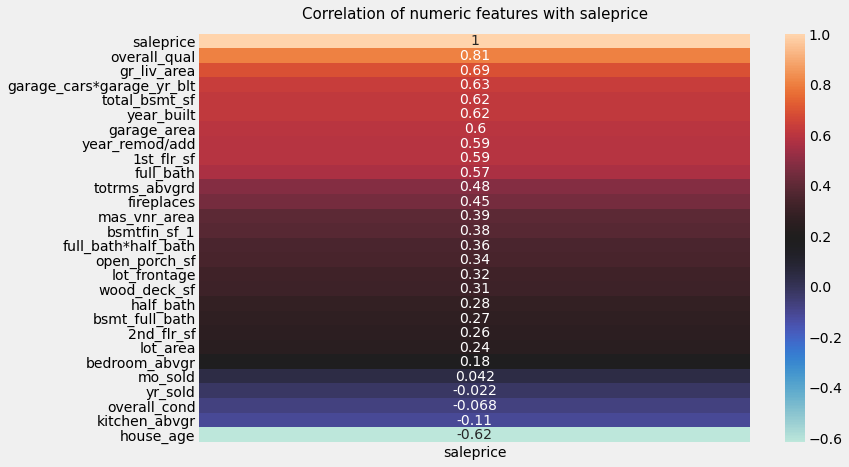

In [297]:
single_corr_heatmap(clean_train_df,['saleprice'])

Despite combining them, `full_bath*half_bath` still produce very little correlation. Will drop them

In [298]:
# Drop the 'full_bath*half_bath feature
clean_train_df.drop(['full_bath*half_bath'], axis=1, inplace=True)

In [299]:
# Combine bsmt_full_bath and full_bath
combine_features(clean_train_df, ['bsmt_full_bath', 'full_bath'])

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,sale_type,saleprice,house_age,garage_cars*garage_yr_blt,bsmt_full_bath*full_bath
0,2story_1946_&_newer,RL,69.06,13517.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725.0,754.0,1479.0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,475.0,TA,TA,Y,0.0,44.0,3,2010,WD,11.779129,34,3952,0
1,2story_1946_&_newer,RL,43.00,11492.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913.0,1209.0,2122.0,1,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,559.0,TA,TA,Y,0.0,74.0,4,2009,WD,12.301383,13,3994,2
2,1story_1946_&_newer_all_styles,RL,68.00,7922.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057.0,0.0,1057.0,1,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,246.0,TA,TA,Y,0.0,52.0,1,2010,WD,11.599103,57,1953,1
3,2story_1946_&_newer,RL,73.00,9802.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744.0,700.0,1444.0,0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,400.0,TA,TA,Y,100.0,0.0,4,2010,WD,12.066811,4,4014,0
4,11/2_story_finished_all_ages,RL,82.00,14235.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831.0,614.0,1445.0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,484.0,TA,TA,N,0.0,59.0,3,2010,WD,11.838626,110,3914,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1story_1946_&_newer_all_styles,RL,79.00,11449.0,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,1884.0,GasA,Ex,Y,SBrkr,1728.0,0.0,1728.0,1,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,520.0,TA,TA,Y,0.0,276.0,1,2008,WD,12.607366,1,4014,2
1896,1story_1945_&_older,RL,69.06,12342.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,861.0,GasA,Ex,Y,SBrkr,861.0,0.0,861.0,0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,Unf,539.0,TA,TA,Y,158.0,0.0,3,2009,WD,11.320554,69,3922,0
1897,11/2_story_finished_all_ages,RL,57.00,7558.0,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,896.0,GasA,Gd,Y,SBrkr,1172.0,741.0,1913.0,0,1,1,3,1,TA,9,Typ,1,TA,Detchd,Unf,342.0,Fa,Fa,Y,0.0,0.0,3,2009,WD,12.083905,81,3858,0
1898,1story_1946_&_newer_all_styles,RL,80.00,10400.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,1200.0,GasA,TA,Y,SBrkr,1200.0,0.0,1200.0,1,1,0,3,1,TA,6,Typ,2,Gd,Attchd,Unf,294.0,TA,TA,Y,0.0,189.0,11,2009,WD,11.877569,

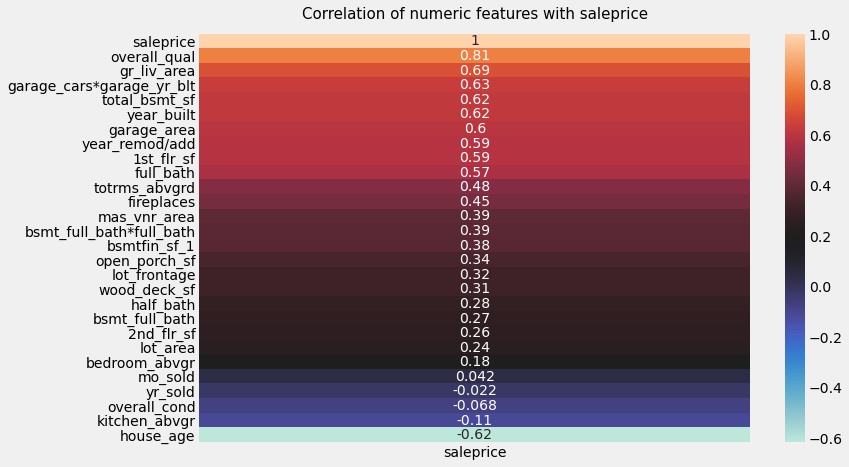

In [300]:
single_corr_heatmap(clean_train_df, ['saleprice'])

Combining the features don't seem to increase the correlation with `saleprice` as `full_bath` has the higher correlation. Will drop the combined feature

In [301]:
# Drop bsmt_full_bath*full_bath
clean_train_df.drop('bsmt_full_bath*full_bath', axis=1, inplace=True)

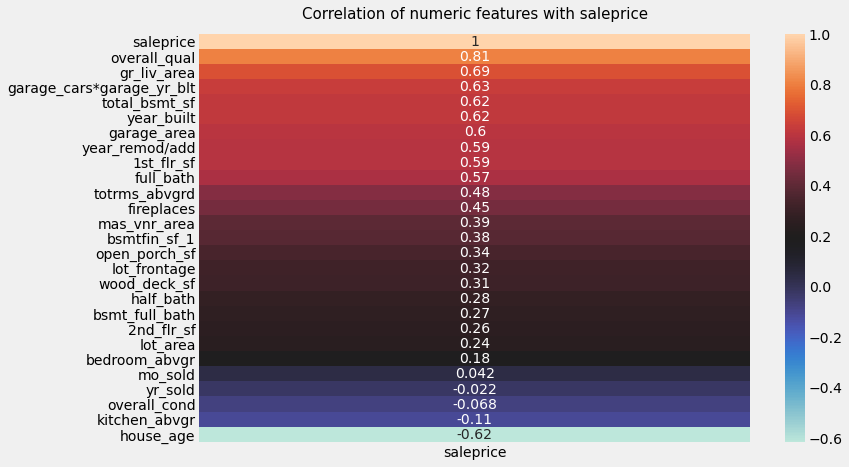

In [302]:
single_corr_heatmap(clean_train_df,['saleprice'])

In [303]:
# Combine both 1st_flr_sf and 2nd_flr_sf
combine_features(clean_train_df, ['1st_flr_sf', '2nd_flr_sf'])

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,mo_sold,yr_sold,sale_type,saleprice,house_age,garage_cars*garage_yr_blt,1st_flr_sf*2nd_flr_sf
0,2story_1946_&_newer,RL,69.06,13517.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,725.0,GasA,Ex,Y,SBrkr,725.0,754.0,1479.0,0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,RFn,475.0,TA,TA,Y,0.0,44.0,3,2010,WD,11.779129,34,3952,546650.0
1,2story_1946_&_newer,RL,43.00,11492.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,913.0,GasA,Ex,Y,SBrkr,913.0,1209.0,2122.0,1,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,559.0,TA,TA,Y,0.0,74.0,4,2009,WD,12.301383,13,3994,1103817.0
2,1story_1946_&_newer_all_styles,RL,68.00,7922.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,1057.0,GasA,TA,Y,SBrkr,1057.0,0.0,1057.0,1,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,Unf,246.0,TA,TA,Y,0.0,52.0,1,2010,WD,11.599103,57,1953,0.0
3,2story_1946_&_newer,RL,73.00,9802.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,384.0,GasA,Gd,Y,SBrkr,744.0,700.0,1444.0,0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,Fin,400.0,TA,TA,Y,100.0,0.0,4,2010,WD,12.066811,4,4014,520800.0
4,11/2_story_finished_all_ages,RL,82.00,14235.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,676.0,GasA,TA,Y,SBrkr,831.0,614.0,1445.0,0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,Unf,484.0,TA,TA,N,0.0,59.0,3,2010,WD,11.838626,110,3914,510234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1story_1946_&_newer_all_styles,RL,79.00,11449.0,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,1884.0,GasA,Ex,Y,SBrkr,1728.0,0.0,1728.0,1,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,520.0,TA,TA,Y,0.0,276.0,1,2008,WD,12.607366,1,4014,0.0
1896,1story_1945_&_older,RL,69.06,12342.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,861.0,GasA,Ex,Y,SBrkr,861.0,0.0,861.0,0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,Unf,539.0,TA,TA,Y,158.0,0.0,3,2009,WD,11.320554,69,3922,0.0
1897,11/2_story_finished_all_ages,RL,57.00,7558.0,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,896.0,GasA,Gd,Y,SBrkr,1172.0,741.0,1913.0,0,1,1,3,1,TA,9,Typ,1,TA,Detchd,Unf,342.0,Fa,Fa,Y,0.0,0.0,3,2009,WD,12.083905,81,3858,868452.0
1898,1story_1946_&_newer_all_styles,RL,80.00,10400.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1956,1956,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,155.0,LwQ,1200.0,GasA,TA,Y,SBrkr,1200.0,0.0,1200.0,1,1,0,3,1,TA,6,Typ,2,Gd,Attchd,Unf,294.0,

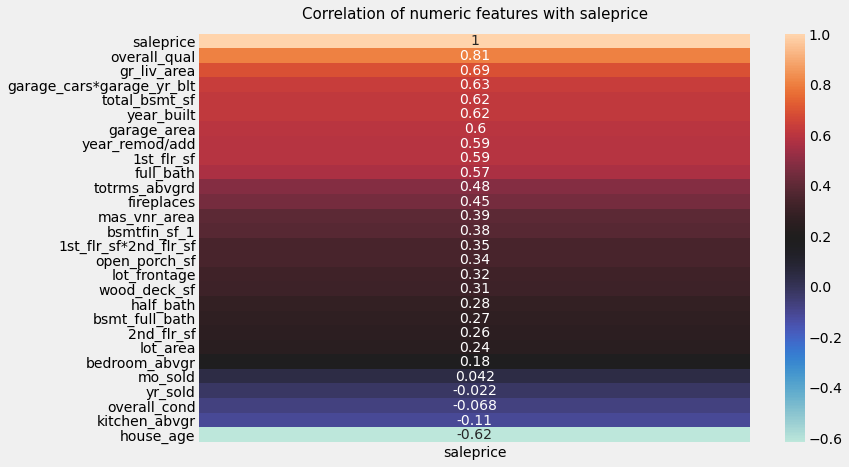

In [304]:
single_corr_heatmap(clean_train_df, ['saleprice'])

There does not seem to be a significant increase in correlation for `1st_flr_sf*2nd_flr_sf`. Will drop them

In [305]:
# Drop 1st_flr_sf*2nd_flr_sf
clean_train_df.drop('1st_flr_sf*2nd_flr_sf', axis=1, inplace=True)

### Correlation between the features

In [4]:
# Scatter matrix of notable variables
from pandas.plotting import scatter_matrix

attributes = [
    "lot_area",
    "lot_frontage",
    "bsmtfin_sf_1",
    "total_bsmt_sf",
    "mas_vnr_area",
    "1st_flr_sf",
    "2nd_flr_sf",
    "gr_liv_area",
    "garage_area",
    "wood_deck_sf",
    "saleprice"
]

scatter_matrix(clean_train_df[attributes], figsize=(35,25));

NameError: name 'clean_train_df' is not defined

Some notable attributes that have decent to strong correlations with `saleprice` are:
* lot_frontage (decent positive correlation)
* bsmtfin_sf_1 (decent positive correlation)
* total_bsmt_sf (strong positive correlation)
* mas_vnr_area (decent positive correlation)
* 1st_flr_sf (strong positive correlation)
* gr_liv_area (strong positive correlation)
* garage_area (strong positive correlation)

## Drop features with poor correlation with `saleprice`

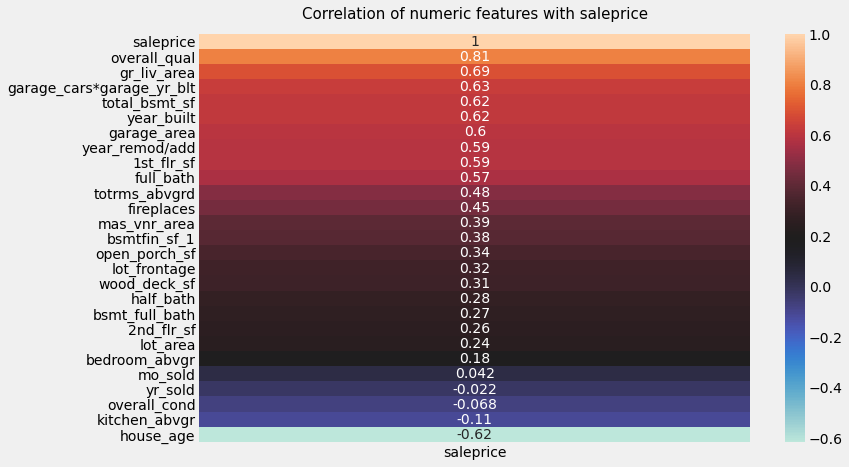

In [307]:
single_corr_heatmap(clean_train_df,['saleprice'])

Any features with **correlation of < 0.26 or  will be dropped.**

**'half_bath', 'lot_area', '2nd_flr_sf', 'bedroom_abvgr', 'mo_sold', 'yr_sold', 'kitchen_abvgr', 'overall_cond'  have very little correlation with the saleprice**.

Highest correlation features:
* gr_liv_area
* garage_area
* garage_cars
* total_bsmt_sf
* 1st_flr_sf

Lowest correlation features:
* half_bath
* lot_area
* 2nd_flr_sf
* bedroom_abvgr
* mo_sold
* yr_sold
* kitchen_abvgr
* overall_cond

In [308]:
# Drop poorly correlated features with saleprice
clean_train_df = clean_train_df.drop(
    ['half_bath', 'lot_area', '2nd_flr_sf', 'bedroom_abvgr', 'mo_sold', 'yr_sold', 'kitchen_abvgr', 'overall_cond'], axis=1)

## Checking for multi-colinarity between numeric features

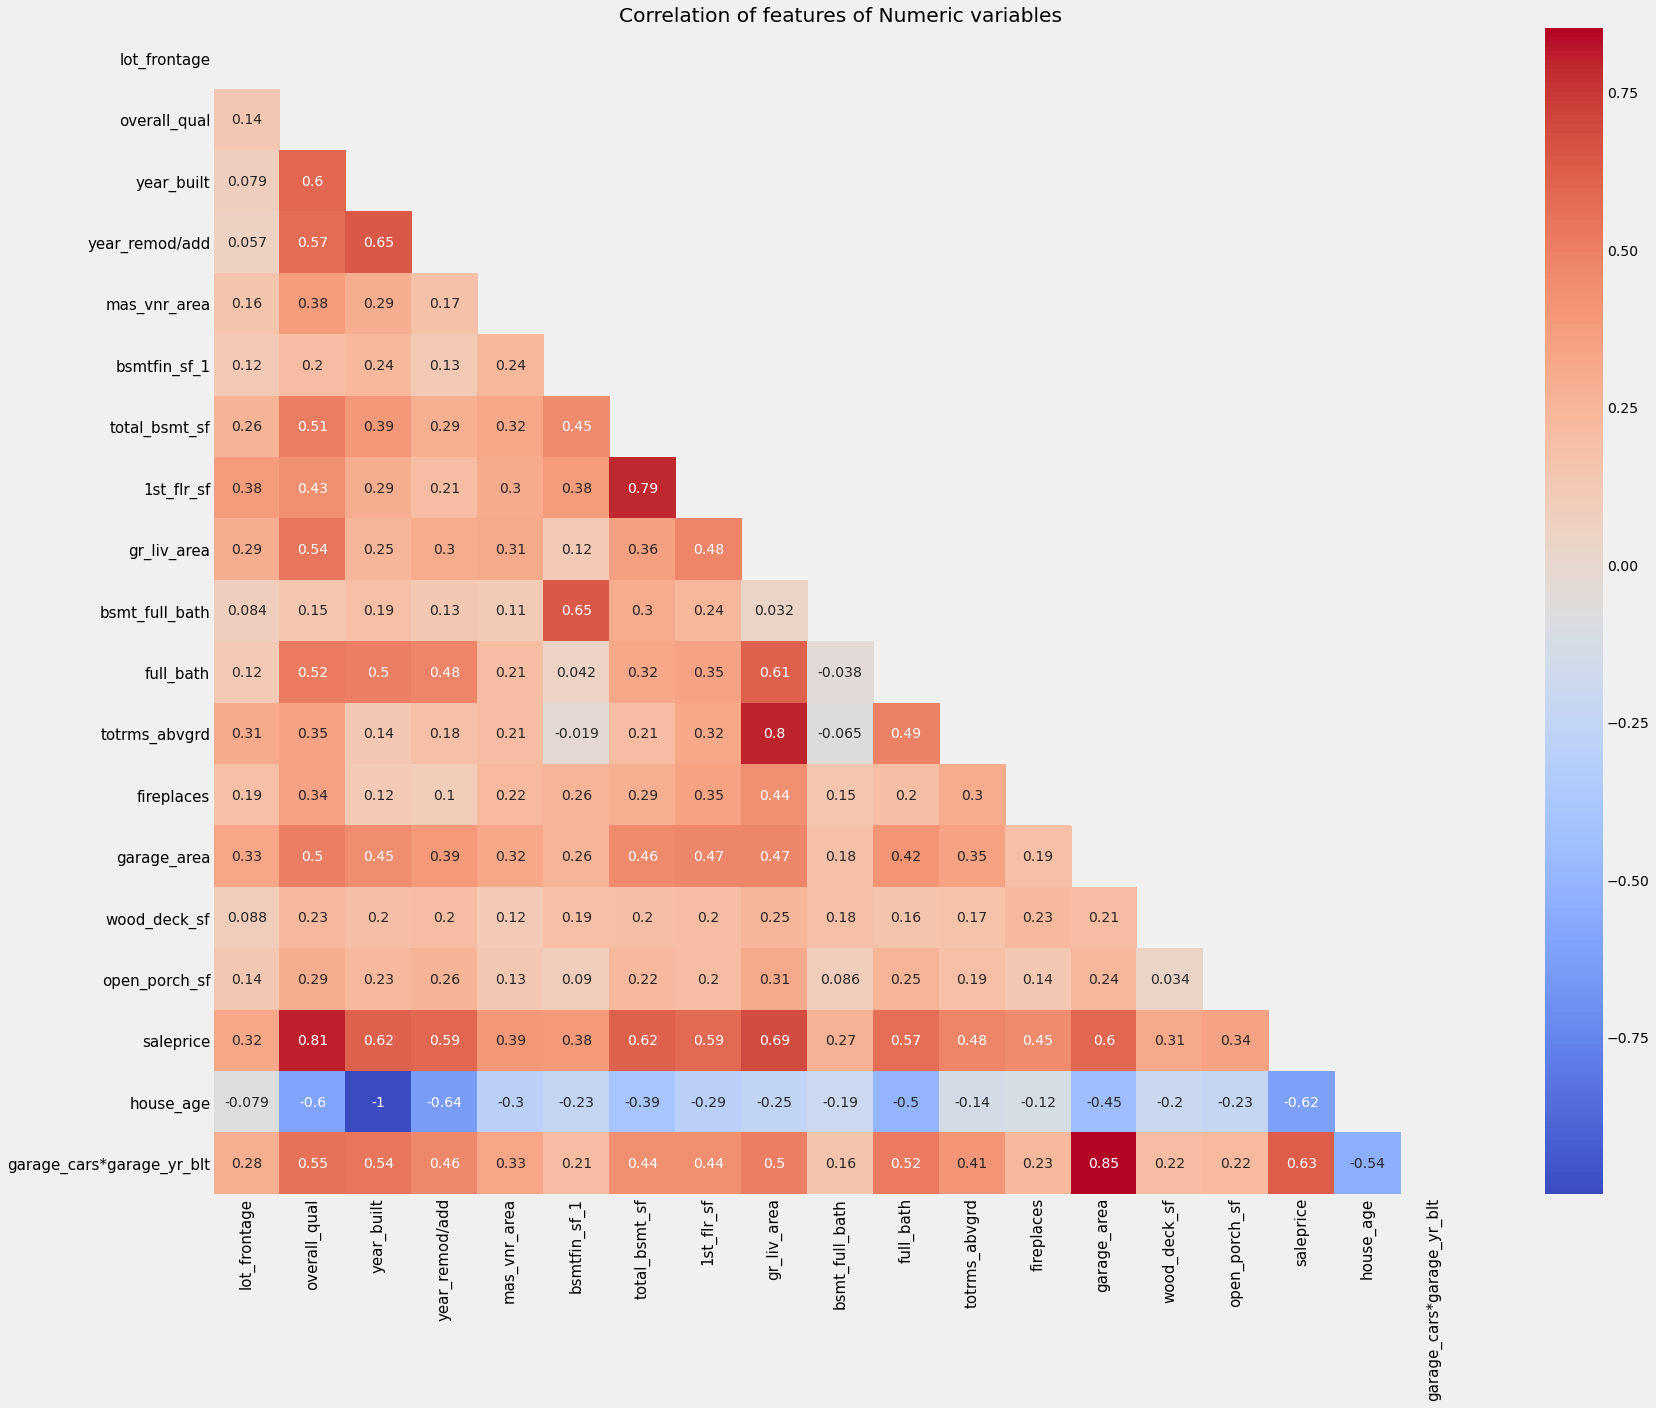

In [309]:
corr_heatmap(clean_train_df, 'Numeric', 'coolwarm')

The following features have strong mulit-corrlinearity between them: (Any 3 feature or more features with correlation > 0.5)
* overall_qual (7 features)
* year_built (3 features)
* gr_liv_area (2 features)
* garage_area (2 features)

Will drop `overall_qual`  and `year_built`

In [310]:
# Drop `overall_qual` and `year_built`
clean_train_df = clean_train_df.drop(['overall_qual', 'year_built'], axis=1)


## Heatmap Correlation of ordinal variables

In [311]:
train_df_ord = clean_train_df[['lot_shape',
                               'utilities',
                               'land_slope',
                               'exter_qual',
                               'exter_cond',
                               'bsmt_qual',
                               'bsmt_cond',
                               'bsmt_exposure',
                               'bsmtfin_type_1',
                               'bsmtfin_type_2',
                               'heating_qc',
                               'electrical',
                               'kitchen_qual',
                               'functional',
                               'fireplace_qu',
                               'garage_finish',
                               'garage_qual',
                               'garage_cond',
                               'paved_drive']]

In [312]:
# Rename the columns of the ordinal dataframe
train_df_ord = train_df_ord.rename(columns=add_underscore_char(train_df_ord))
train_df_ord

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive
0,IR1,AllPub,Gtl,Gd,TA,TA,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,NaN,RFn,TA,TA,Y
1,IR1,AllPub,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y
2,Reg,AllPub,Gtl,TA,Gd,TA,TA,No,GLQ,Unf,TA,SBrkr,Gd,Typ,NaN,Unf,TA,TA,Y
3,Reg,AllPub,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Gd,SBrkr,TA,Typ,NaN,Fin,TA,TA,Y
4,IR1,AllPub,Gtl,TA,TA,Fa,Gd,No,Unf,Unf,TA,SBrkr,TA,Typ,NaN,Unf,TA,TA,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,IR1,AllPub,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,SBrkr,Gd,Typ,Gd,Fin,TA,TA,Y
1896,IR1,AllPub,Gtl,TA,TA,TA,TA,No,BLQ,Unf,Ex,SBrkr,TA,Typ,NaN,Unf,TA,TA,Y
1897,Reg,AllPub,Gtl,TA,TA,TA,TA,No,Unf,Unf,Gd,SBrkr,TA,Typ,TA,Unf,Fa,Fa,Y
1898,Reg,AllPub,Gtl,TA,TA,TA,TA,No,Rec,LwQ,TA,SBrkr,TA,Typ,Gd,Unf,TA,TA,Y


In [313]:
# Drop kitchen_abvgr as it was already dropped previously
# train_df_ord.drop('kitchen_abvgr', axis=1, inplace=True)

In [314]:
# Obtain the columns for ordinal dataframe
ord_columns = train_df_ord.columns

In [315]:
# Obtain the ordinal dataframe from the clean_train_df
clean_train_df_ord = clean_train_df[ord_columns].copy()
clean_train_df_ord.head()

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive
0,IR1,AllPub,Gtl,Gd,TA,TA,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,NaN,RFn,TA,TA,Y
1,IR1,AllPub,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y
2,Reg,AllPub,Gtl,TA,Gd,TA,TA,No,GLQ,Unf,TA,SBrkr,Gd,Typ,NaN,Unf,TA,TA,Y
3,Reg,AllPub,Gtl,TA,TA,Gd,TA,No,Unf,Unf,Gd,SBrkr,TA,Typ,NaN,Fin,TA,TA,Y
4,IR1,AllPub,Gtl,TA,TA,Fa,Gd,No,Unf,Unf,TA,SBrkr,TA,Typ,NaN,Unf,TA,TA,N


In [316]:
# Replace the NaN values with None string for ordinal encoding
clean_train_df_ord.fillna('None', inplace=True)

In [317]:
# Add in the sale price
clean_train_df_ord['saleprice'] = clean_train_df['saleprice']

Using the median price as the benchmark, I would want to see if the sale price increases, as the rank increases (Positive correlation) or decreases (Negative correlation). The ordinal variables which have poor correlation will be dropped. 

In [318]:
def subplot_cat_boxplots(dataframe, list_of_columns, list_of_titles, xlabel = None, yticklabels = None, palette='coolwarm', sup_title='Boxplots'):   
    plt.figure(figsize=(11,7))
    # Set titles, labels, etc here for each subplot
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) >= 2:
        figsize=(32,32)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=25)   
   
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.boxplot(x='saleprice',y=column, data=dataframe, palette=palette, ax=ax[i])
        # Set titles, labels, etc here for each subplot
       
        ax[i].set_title(list_of_titles[i], fontsize=15)
        #ax[i].set_xticks(fontsize=200)
        #ax[i].set_xlabel('H')
        #ax[i].set_xticks(ticks=[tick for tick in range(len(list_of_columns))])
       
        plt.tight_layout(pad=3.0)

> <font size = 3 color = "crimson"> Make boxplots bigger. The text are too small to be read.</font>

<Figure size 792x504 with 0 Axes>

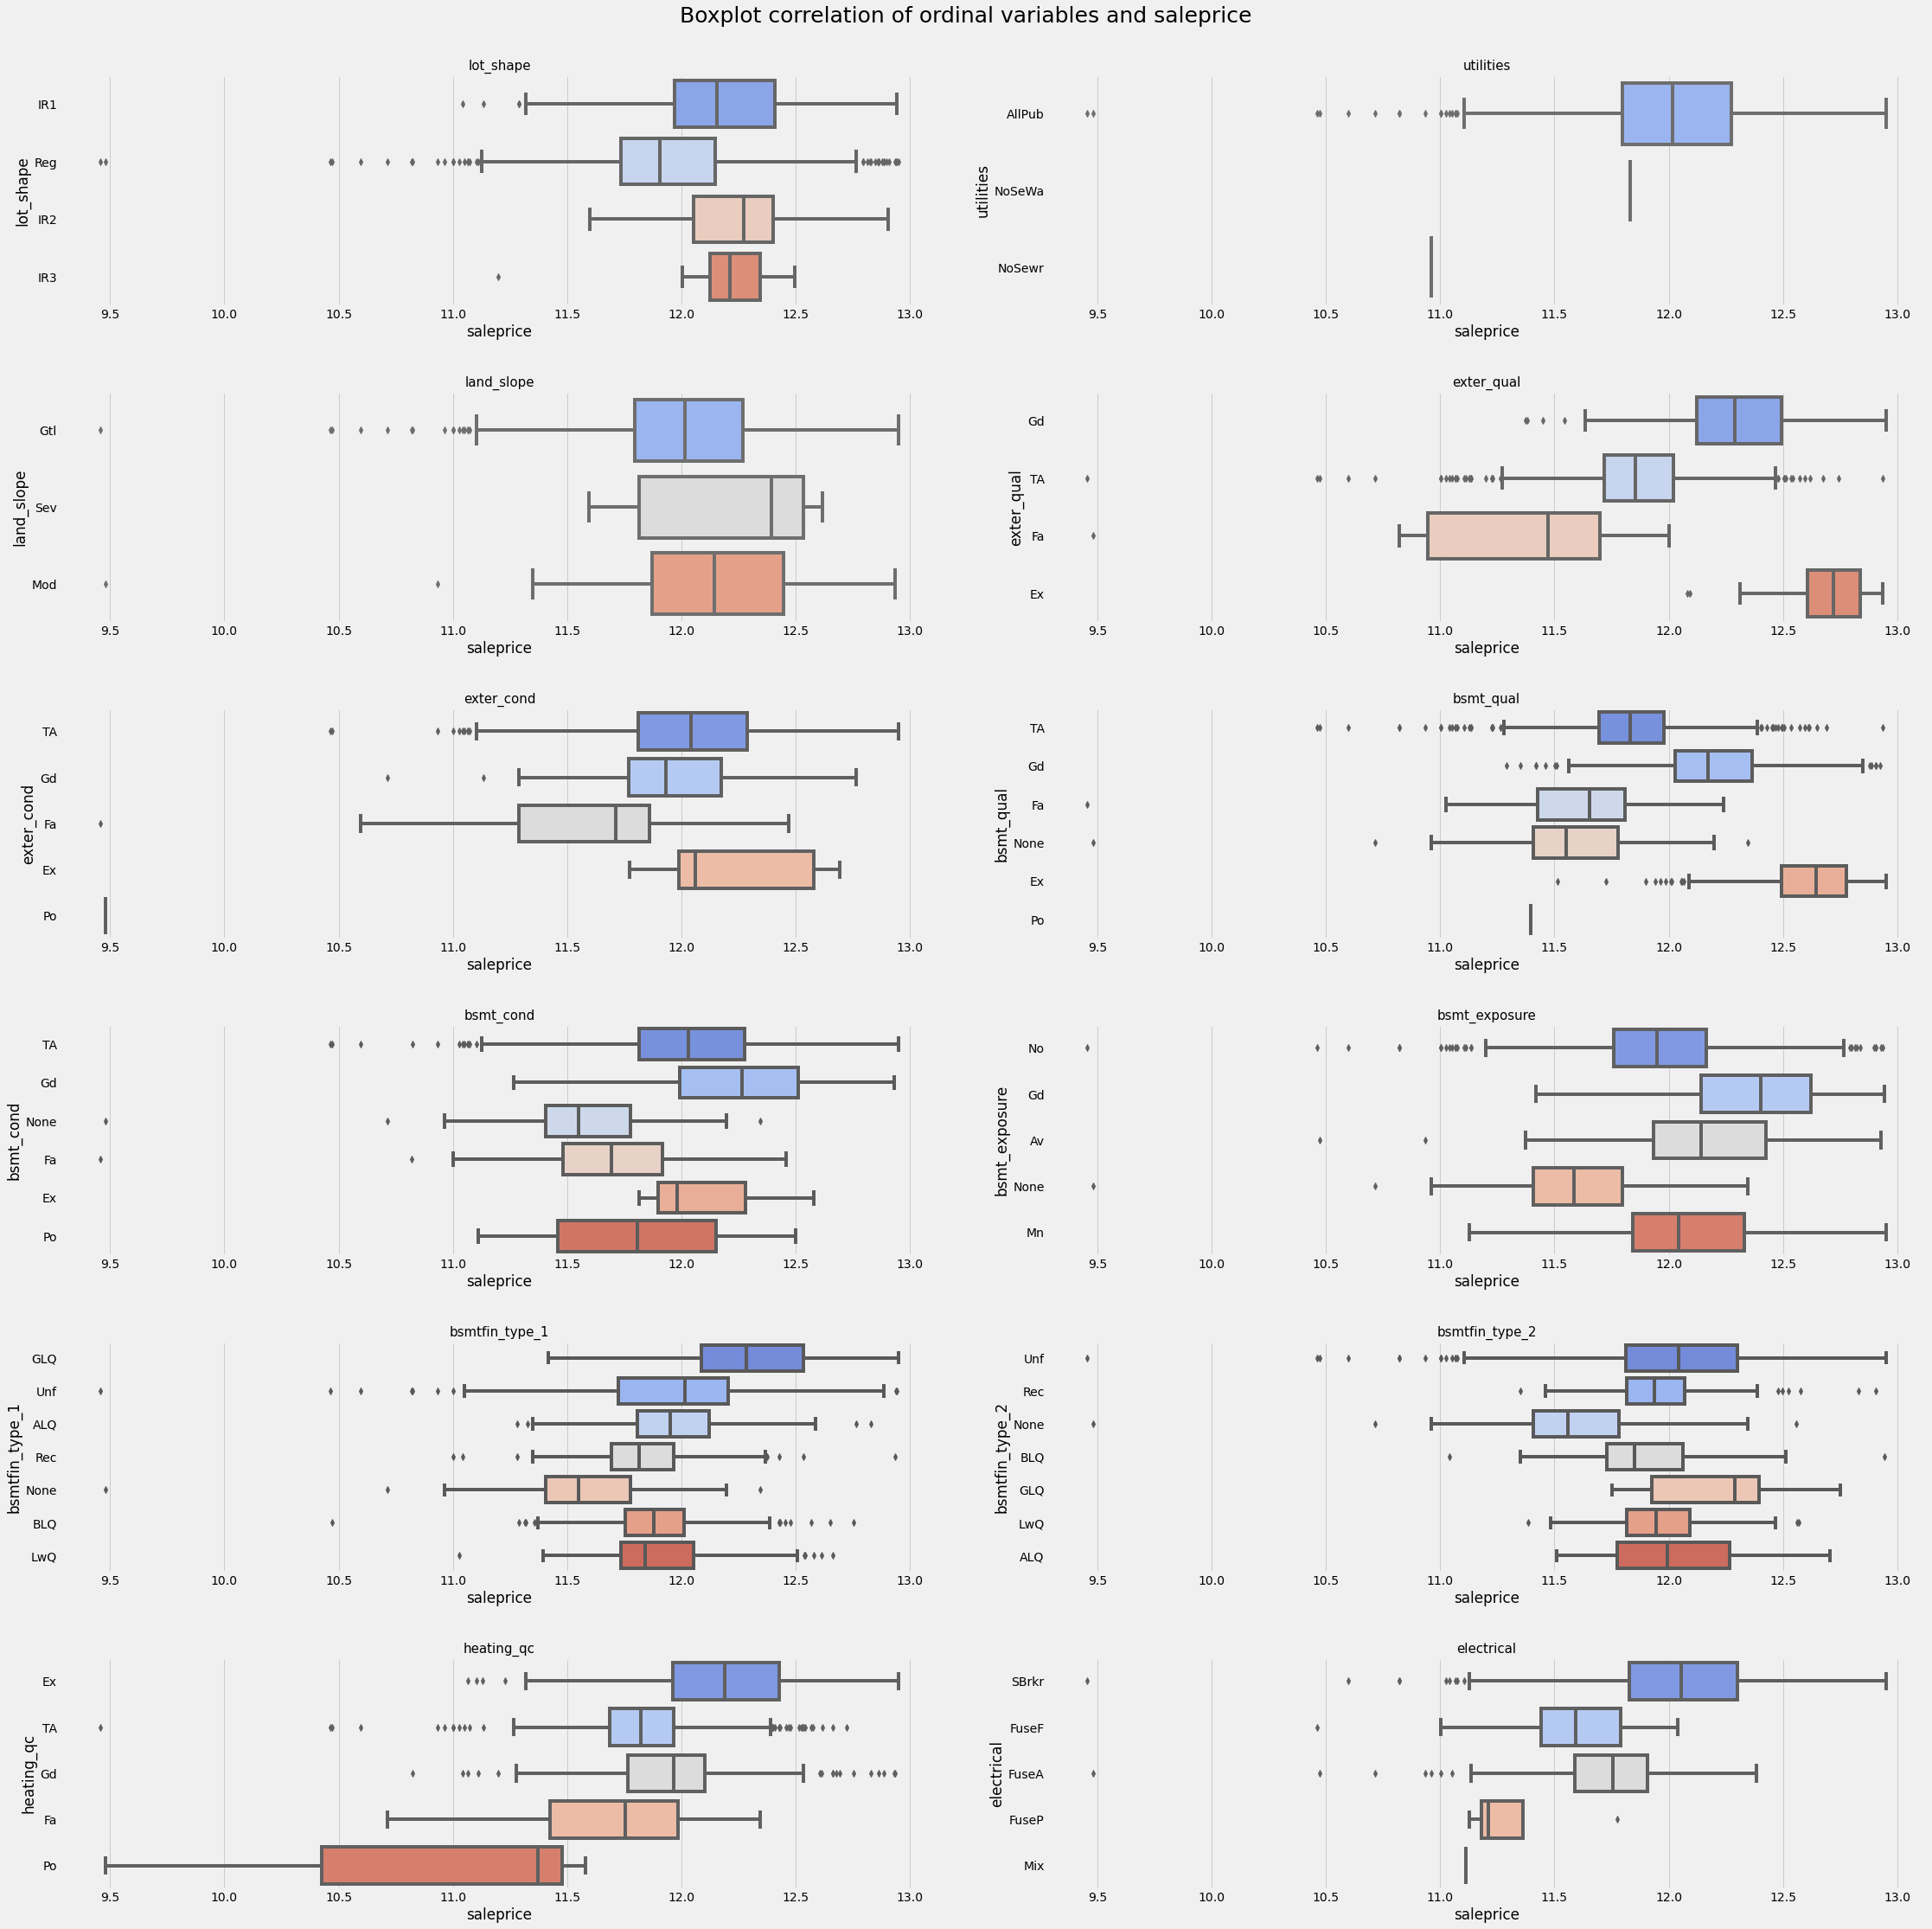

In [319]:
subplot_cat_boxplots(clean_train_df_ord, clean_train_df_ord.columns[:12], clean_train_df_ord.columns[:12], 
                     sup_title='Boxplot correlation of ordinal variables and saleprice')

<Figure size 792x504 with 0 Axes>

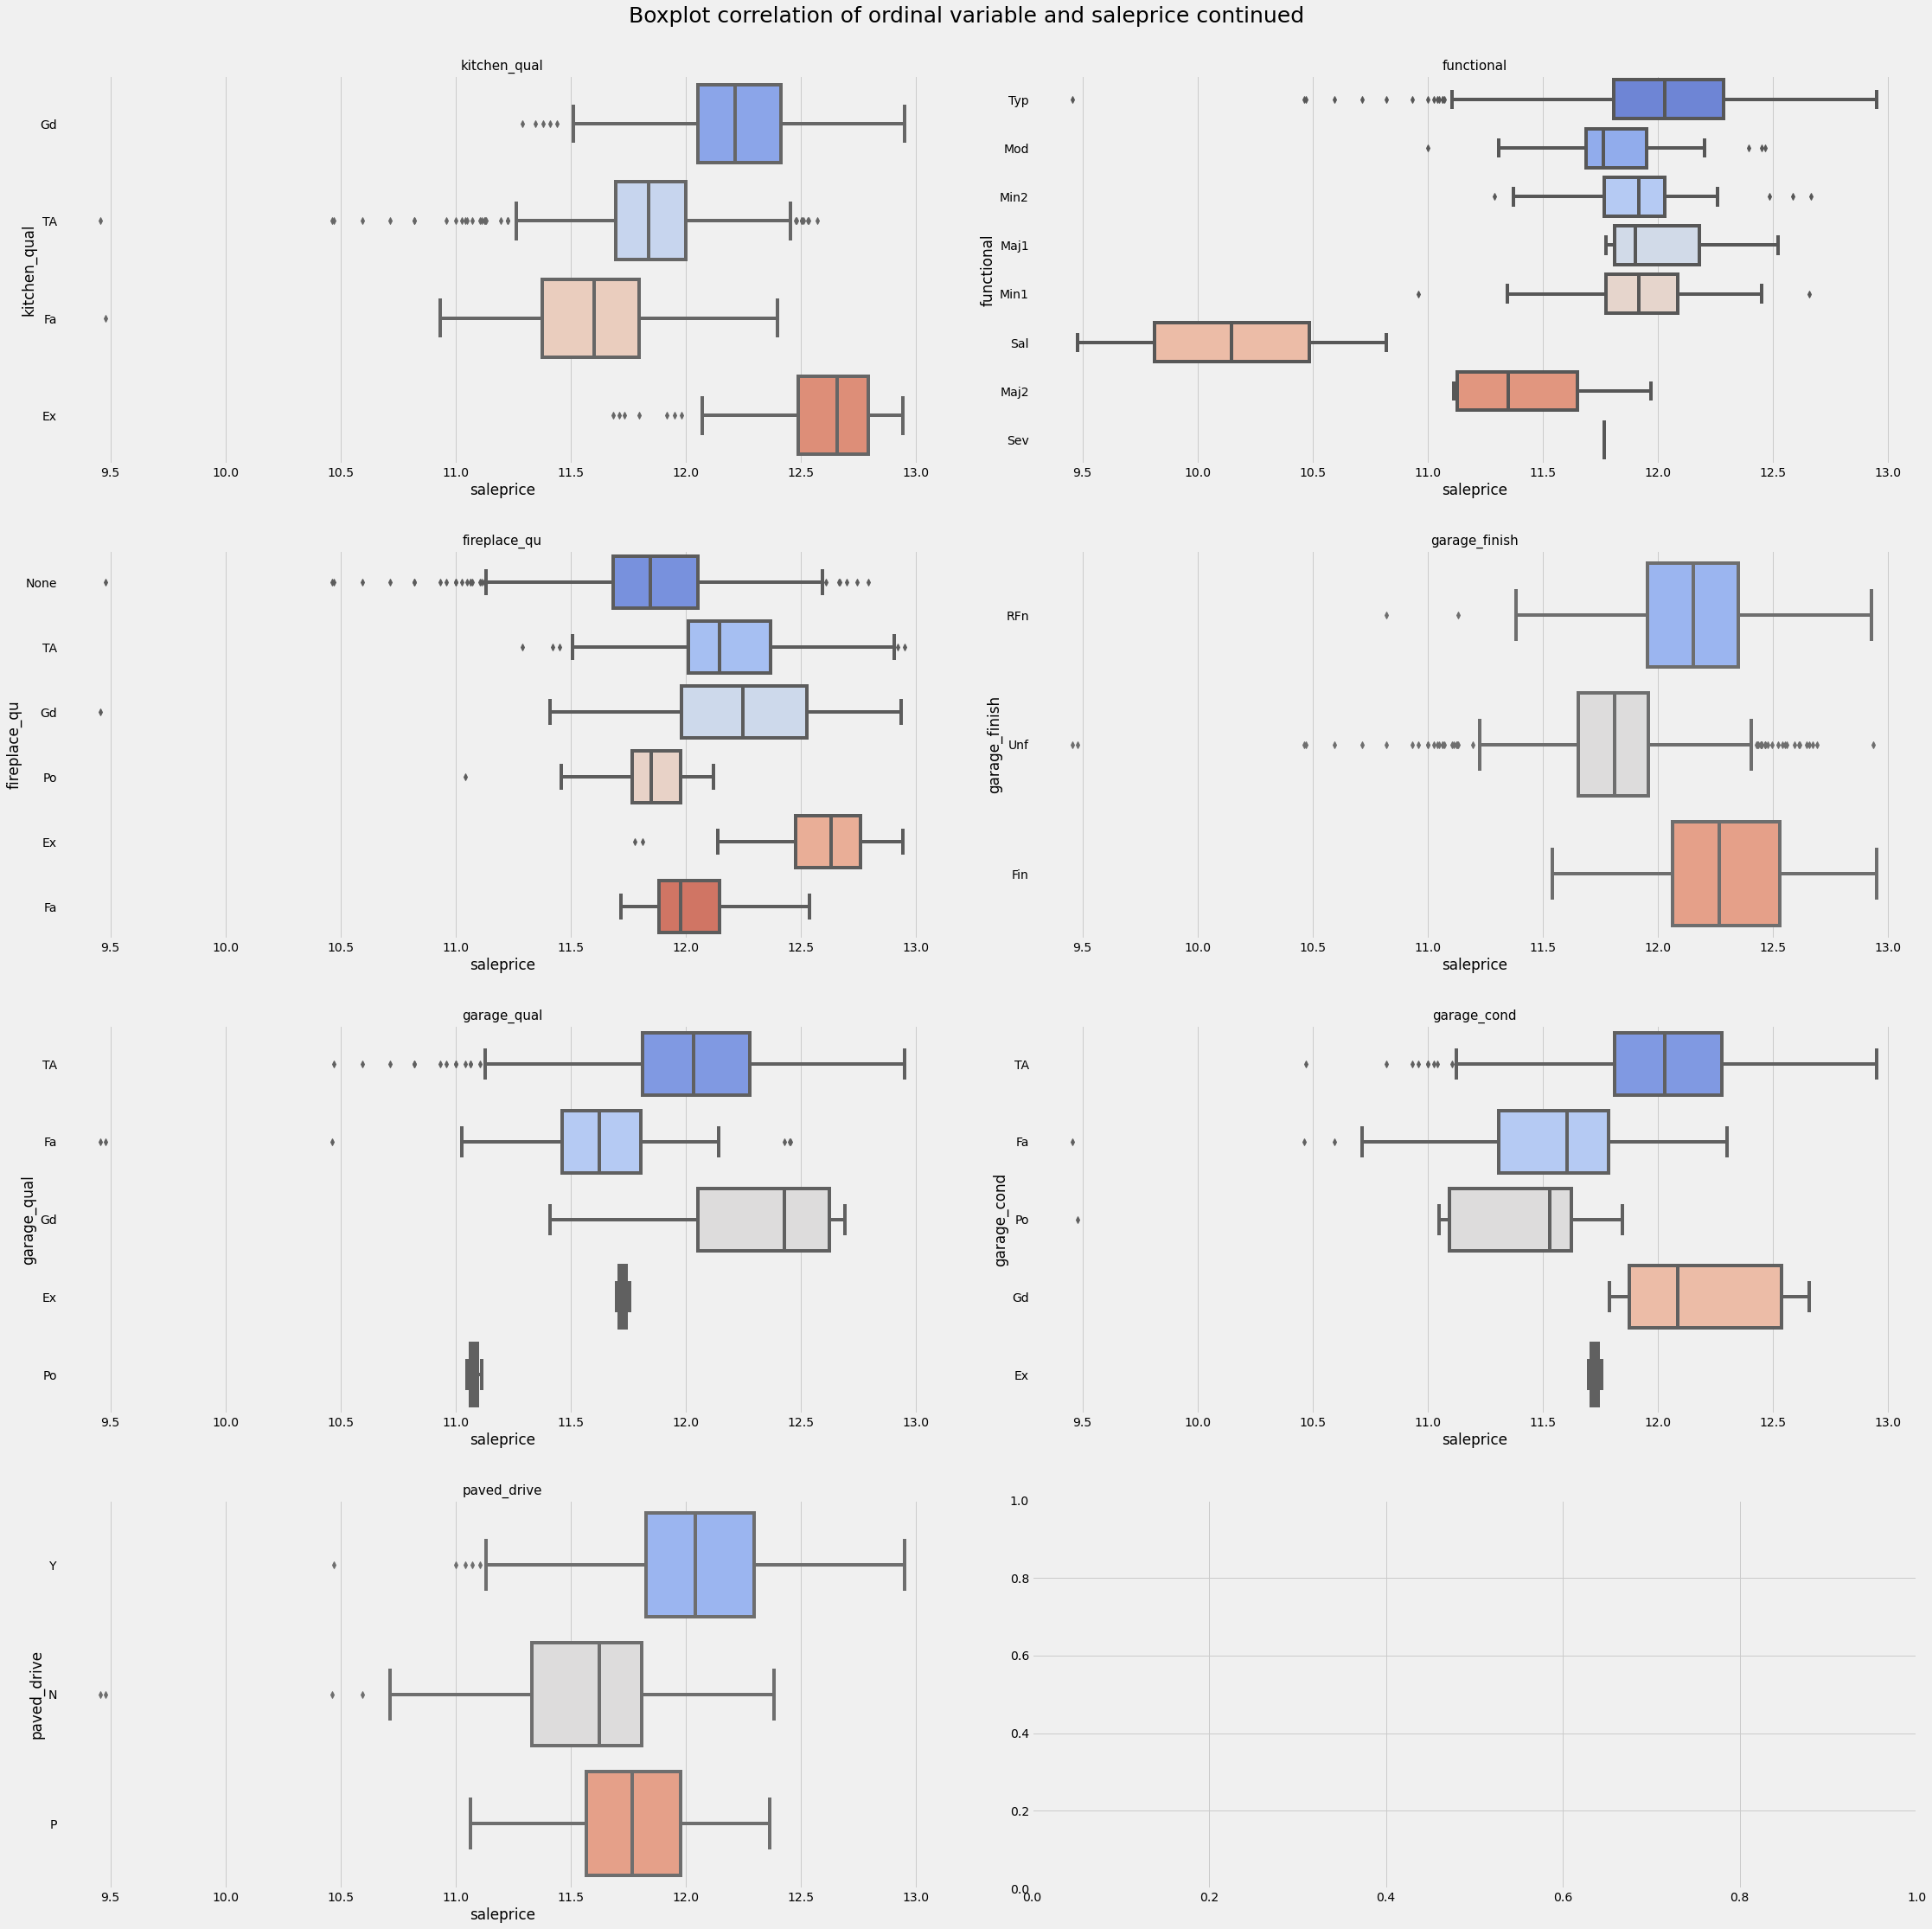

In [320]:
subplot_cat_boxplots(clean_train_df_ord, clean_train_df_ord.columns[12:-1], clean_train_df_ord.columns[12:-1], 
                     sup_title='Boxplot correlation of ordinal variable and saleprice continued')

<AxesSubplot:xlabel='saleprice', ylabel='paved_drive'>

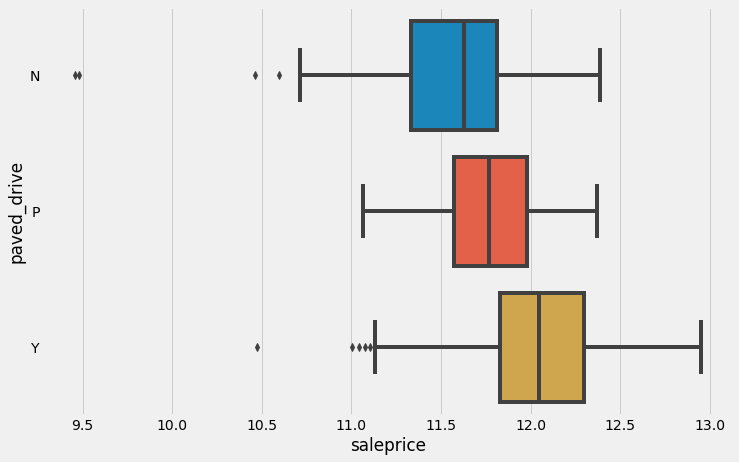

In [321]:
# Check using the order 
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='paved_drive', data=clean_train_df_ord, order=['N', 'P', 'Y'])

 Notes on ordinal variable correlation

* lot_shape (More irregular it becomes, the higher the price)
* Utilities: shows no correlation, only AllPub is the dominant rank
* land_slope: no correlation
* exter_qual: the median price tend to decrease as the quality increases (neg)
* exter_cond: not much correlation
* bsmt_qual: not much correlation
* bsmtfin_cond: positive correlation
* bsmt_expositiveure: not much correlation
* bsmtfin_type_1: No correlation
* bsmtfin_type_2: No correlation
* heating_qc: Median price increase as quality gets better
* electrical: No correlation
* kitchen_qual: positive correlation
* functional: no correlation
* fireplace_qu: No correlation
* garage_finish: No correlation
* garage_qual: Some positive correlation
* garage_cond: strong positive correlation
* paved_drive: No correlation

In [322]:
# Dropped the poorly correlated features
ord_dropped_features = ['utilities', 'land_slope', 'exter_cond', 'bsmt_qual', 
                        'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'electrical', 'functional', 'fireplace_qu', 'garage_finish', 'paved_drive', 'saleprice']
clean_train_df_ord.drop(ord_dropped_features, axis=1,inplace=True)

In [323]:
clean_train_df_ord.head()

,lot_shape,exter_qual,bsmt_cond,heating_qc,kitchen_qual,garage_qual,garage_cond
0,IR1,Gd,TA,Ex,Gd,TA,TA
1,IR1,Gd,TA,Ex,Gd,TA,TA
2,Reg,TA,TA,TA,Gd,TA,TA
3,Reg,TA,TA,Gd,TA,TA,TA
4,IR1,TA,Gd,TA,TA,TA,TA


In [324]:
# Perform ordinal encoding for the clean_train_df_ord to check for correlations
from sklearn.preprocessing import OrdinalEncoder
# Create the categories in order
lotshape = ['Reg','IR1','IR2','IR3']
exterqual = ['Fa', 'TA', 'Gd', 'Ex']
bsmtcond = ['None','Po','Fa', 'TA', 'Gd', 'Ex']
heatingqc = ['Po','Fa', 'TA', 'Gd', 'Ex']
kitchenqual = ['Fa', 'TA', 'Gd', 'Ex']
garagequal = ['Po','Fa', 'TA', 'Gd', 'Ex']
garagecond = ['Po','Fa', 'TA', 'Gd', 'Ex']



ordinal_encoder = OrdinalEncoder(categories=[
    lotshape,
    exterqual,
    bsmtcond,
    heatingqc,
    kitchenqual,
    garagequal,
    garagecond]) # Fill the categories
clean_train_df_ord_encoded = ordinal_encoder.fit_transform(clean_train_df_ord)  # Fit and transform to the ordinal numerics
clean_train_df_ord_encoded = pd.DataFrame(clean_train_df_ord_encoded, columns=clean_train_df_ord.columns.tolist())

Check if the categories remain the same

In [325]:
clean_train_df_ord['kitchen_qual'].value_counts()

TA    965
Gd    786
Ex    119
Fa     30
Name: kitchen_qual, dtype: int64

In [326]:
clean_train_df_ord_encoded['kitchen_qual'].value_counts()

1.0    965
2.0    786
3.0    119
0.0     30
Name: kitchen_qual, dtype: int64

In [327]:
clean_train_df_ord_encoded.head()

,lot_shape,exter_qual,bsmt_cond,heating_qc,kitchen_qual,garage_qual,garage_cond
0,1.0,2.0,3.0,4.0,2.0,2.0,2.0
1,1.0,2.0,3.0,4.0,2.0,2.0,2.0
2,0.0,1.0,3.0,2.0,2.0,2.0,2.0
3,0.0,1.0,3.0,3.0,1.0,2.0,2.0
4,1.0,1.0,4.0,2.0,1.0,2.0,2.0


## Checking for multicollinearity of ordinal variables

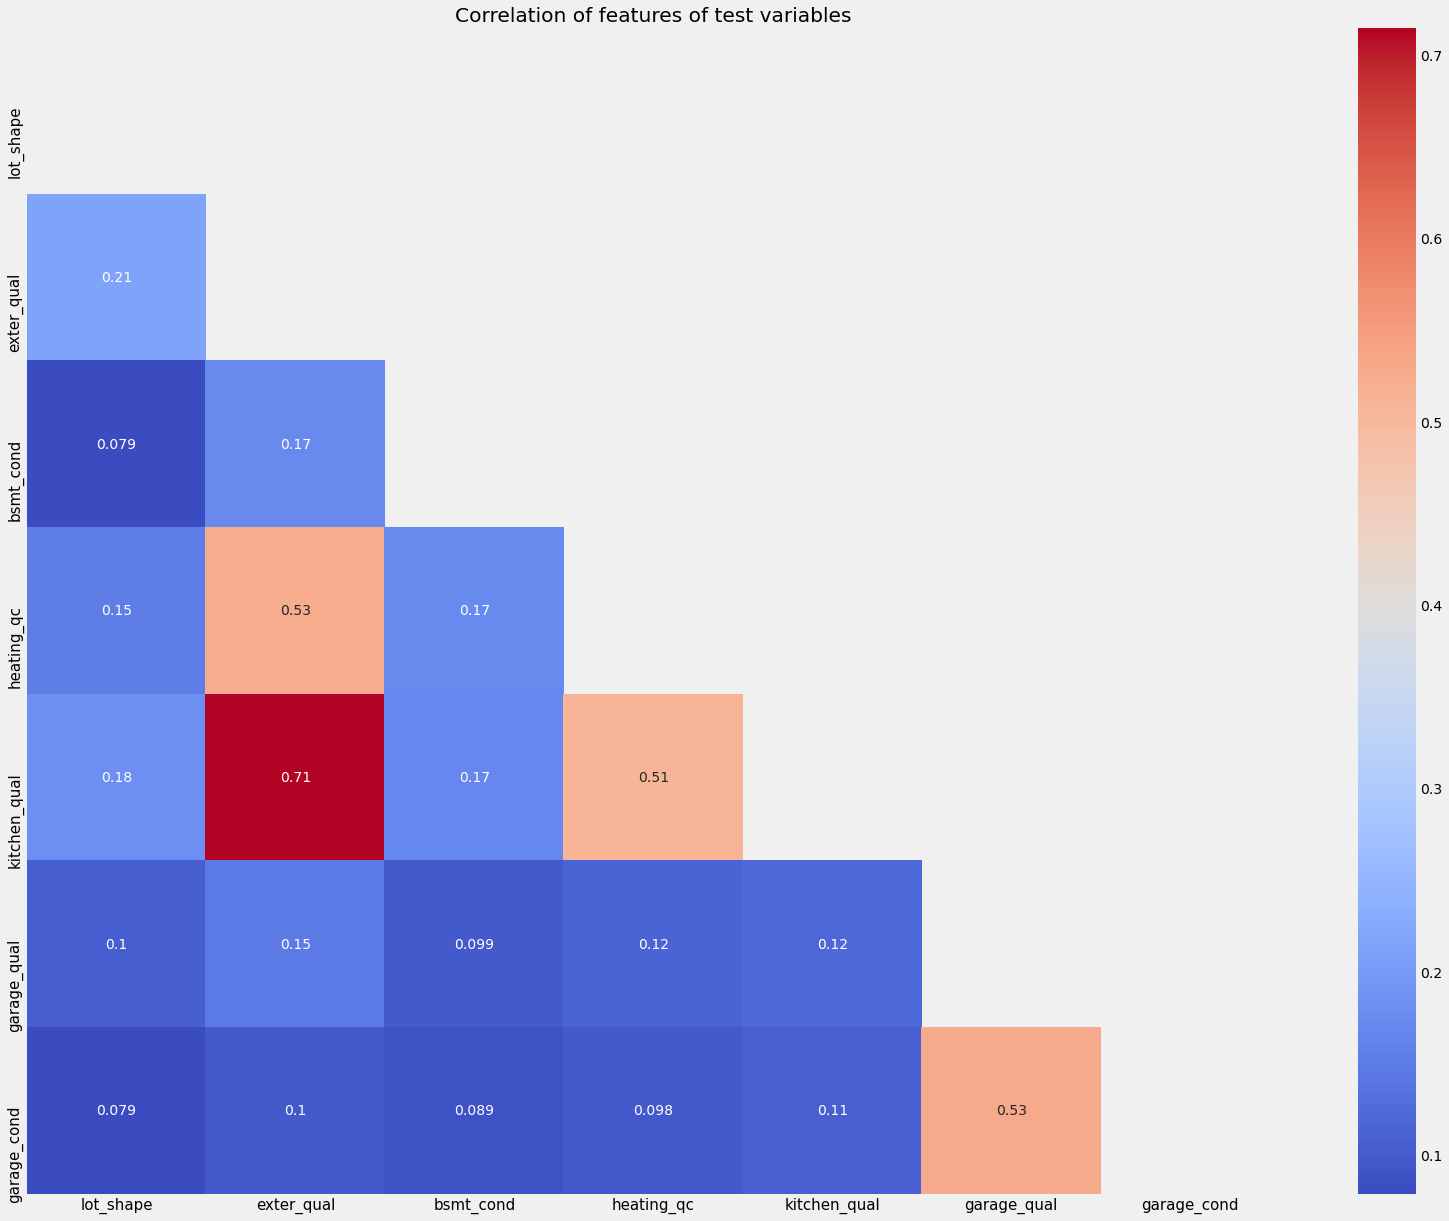

In [328]:
corr_heatmap(clean_train_df_ord_encoded)


Dropped  `kitchen_qual` as it's showing high correlation with `exteral_qual`

In [329]:
clean_train_df_ord_encoded.drop('kitchen_qual', axis=1, inplace=True)

## Train_df_nom correlation

In [330]:
# Nominal variables
train_df_nom= clean_train_df[['ms_subclass',
 'ms_zoning',
 'street',
 'land_contour',
 'lot_config',
 'neighborhood',
 'condition_1',
 'condition_2',
 'bldg_type',
 'house_style',
 'roof_style',
 'roof_matl',
 'exterior_1st',
 'exterior_2nd',
 'mas_vnr_type',
 'foundation',
 'heating',
 'central_air',
 'garage_type',
 'sale_type']].copy()


In [331]:
# Obtain the columns for nominal dataframe
nom_columns = add_underscore_char(train_df_nom.columns).values()


In [332]:
# Obtaining nominal dataframe
clean_train_df_nom = clean_train_df[nom_columns].copy()
clean_train_df_nom

,ms_subclass,ms_zoning,street,land_contour,lot_config,neighborhood,condition_1,condition_2,bldg_type,house_style,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,foundation,heating,central_air,garage_type,sale_type
0,2story_1946_&_newer,RL,Pave,Lvl,CulDSac,Sawyer,RRAe,Norm,1Fam,2Story,Gable,CompShg,HdBoard,Plywood,BrkFace,CBlock,GasA,Y,Attchd,WD
1,2story_1946_&_newer,RL,Pave,Lvl,CulDSac,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,Attchd,WD
2,1story_1946_&_newer_all_styles,RL,Pave,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,WD
3,2story_1946_&_newer,RL,Pave,Lvl,Inside,Timber,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,WD
4,11/2_story_finished_all_ages,RL,Pave,Lvl,Inside,SawyerW,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Plywood,None,PConc,GasA,Y,Detchd,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1story_1946_&_newer_all_styles,RL,Pave,HLS,Inside,Timber,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,Attchd,WD
1896,1story_1945_&_older,RL,Pave,Lvl,Inside,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,CBlock,GasA,Y,Detchd,WD
1897,11/2_story_finished_all_ages,RL,Pave,Bnk,Inside,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Stone,None,BrkTil,GasA,Y,Detchd,WD
1898,1story_1946_&_newer_all_styles,RL,Pave,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,None,CBlock,GasA,Y,Attchd,WD


In [333]:
# Add back saleprice to check correlation
clean_train_df_nom['saleprice'] = clean_train_df['saleprice']


In [334]:
# Mas_vnr_type has 19 null values, will need to replace them with None
clean_train_df_nom.isnull().sum().sort_values(ascending=False)


mas_vnr_type    19
saleprice        0
house_style      0
ms_zoning        0
street           0
land_contour     0
lot_config       0
neighborhood     0
condition_1      0
condition_2      0
bldg_type        0
roof_style       0
sale_type        0
roof_matl        0
exterior_1st     0
exterior_2nd     0
foundation       0
heating          0
central_air      0
garage_type      0
ms_subclass      0
dtype: int64

In [335]:
# Fill the NaN values with 'None'
clean_train_df_nom.fillna('None',inplace=True)

In [336]:
# There are no more null values
clean_train_df_nom.isnull().sum().sum()

0

<AxesSubplot:xlabel='saleprice', ylabel='neighborhood'>

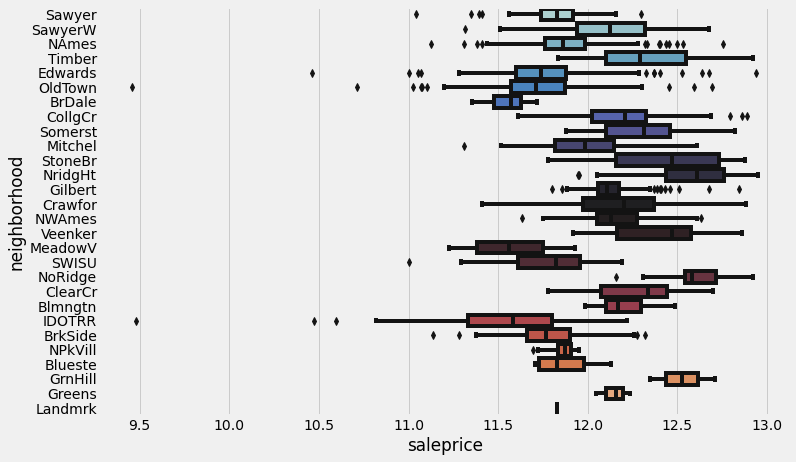

In [337]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='neighborhood',data=clean_train_df_nom, palette='icefire')
# plt.savefig('../images/Neighborhood')

In [338]:
clean_train_df_nom['neighborhood'].value_counts(normalize=True).sort_values(ascending=False) * 100


NAmes      15.894737
CollgCr     9.315789
OldTown     7.526316
Somerst     6.789474
Gilbert     6.105263
Edwards     5.789474
NridgHt     5.631579
Sawyer      5.631579
NWAmes      4.578947
SawyerW     4.263158
Mitchel     4.157895
Crawfor     3.736842
BrkSide     3.473684
IDOTRR      2.631579
Timber      2.421053
NoRidge     2.368421
StoneBr     1.473684
SWISU       1.421053
ClearCr     1.368421
Blmngtn     1.157895
BrDale      0.947368
MeadowV     0.894737
Veenker     0.894737
NPkVill     0.894737
Blueste     0.315789
Greens      0.157895
GrnHill     0.105263
Landmrk     0.052632
Name: neighborhood, dtype: float64

As location plays an important role in pricing in houses, I've intend to keep the neighborhoods feature.There are some neighborhoods that make up a small proportion of the entire neighborhoods. This would create additional unwanted features during one-hot encoding. I'll group them up together as `others` to reduce the features. Any values less than 0.057 would be considered low priced neighborhoods.

In [339]:
replace_with_other = clean_train_df_nom['neighborhood'].value_counts(normalize=True)[
    clean_train_df_nom['neighborhood'].value_counts(normalize=True) <= 0.057].index.tolist()
replace_with_other

['NridgHt',
 'Sawyer',
 'NWAmes',
 'SawyerW',
 'Mitchel',
 'Crawfor',
 'BrkSide',
 'IDOTRR',
 'Timber',
 'NoRidge',
 'StoneBr',
 'SWISU',
 'ClearCr',
 'Blmngtn',
 'BrDale',
 'MeadowV',
 'Veenker',
 'NPkVill',
 'Blueste',
 'Greens',
 'GrnHill',
 'Landmrk']

In [340]:
# Group the lower priced neighborhood with 'others'
clean_train_df_nom['neighborhood'] = clean_train_df_nom['neighborhood'].map(lambda x:x.replace(x,'Others') if x in replace_with_other else x)

In [341]:
clean_train_df_nom['neighborhood'].value_counts(normalize=True) * 100


Others     48.578947
NAmes      15.894737
CollgCr     9.315789
OldTown     7.526316
Somerst     6.789474
Gilbert     6.105263
Edwards     5.789474
Name: neighborhood, dtype: float64

Text(0.5, 1.0, 'Neighborhoods and their price range')

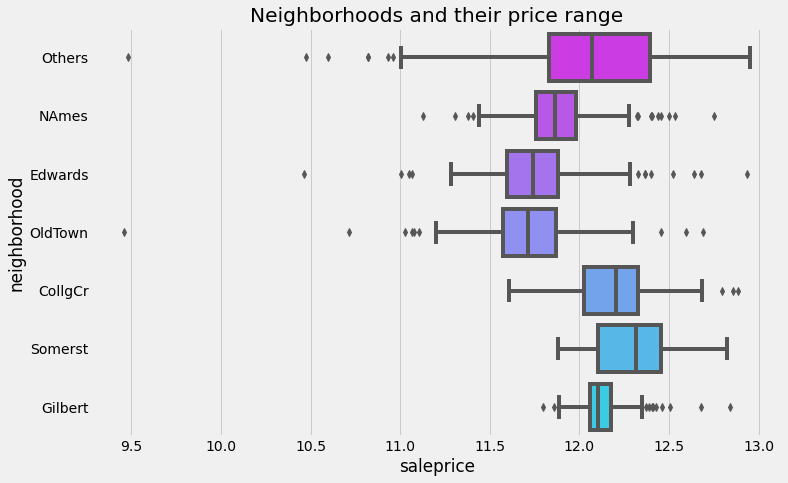

In [342]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='neighborhood',data=clean_train_df_nom, palette='cool_r')
plt.title('Neighborhoods and their price range')

I've decided to keep `CollgCr`, `Somerst`, `Gilbert` and `Others` as their median price is much higher compared to other neighborhoods.

In [343]:
proportion_dwelling = pd.DataFrame(data=(clean_train_df_nom['ms_subclass'].value_counts(normalize=True)*100).values,
                                   index=clean_train_df_nom['ms_subclass'].value_counts().index, columns=['Proportion of dwelling'])

In [344]:
proportion_dwelling

,Proportion of dwelling
1story_1946_&_newer_all_styles,38.210526
2story_1946_&_newer,20.000000
11/2_story_finished_all_ages,9.631579
1story_pud_(planned_unit_development)__1946_&_newer,6.947368
split_or_multilevel,4.526316
2story_1945_&_older,4.368421
2story_pud__1946_&_newer,4.368421
1story_1945_&_older,4.210526
duplex__all_styles_and_ages,2.842105
2_family_conversion__all_styles_and_ages,1.578947


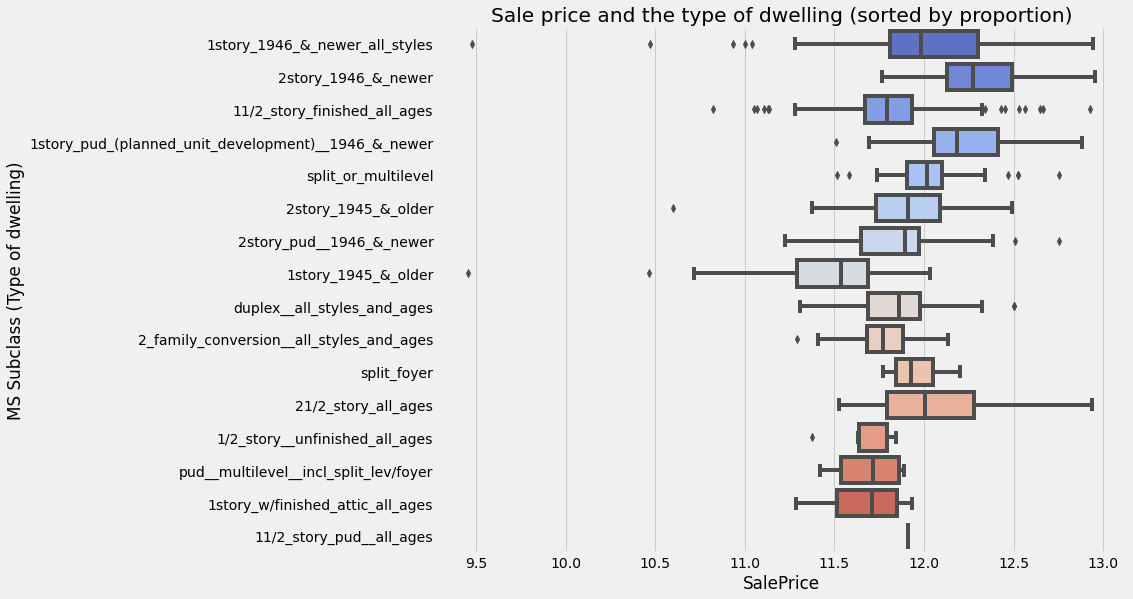

In [345]:
# ms_subclass
plt.figure(figsize=(11,9))
sns.boxplot(x='saleprice',y='ms_subclass',data=clean_train_df_nom, palette='coolwarm', order=proportion_dwelling.index)

plt.title('Sale price and the type of dwelling (sorted by proportion)')
plt.xlabel('SalePrice')
plt.ylabel('MS Subclass (Type of dwelling)');

Generally, 1story and 2story 1946 housing have higher median pricing compared to 11/2 and 1945 housing story. I'll group the lower proportion of housing, any housing as less than 5, as `Others` to clean up the features

In [346]:
dwelling_less_than_5 = clean_train_df_nom['ms_subclass'].value_counts(normalize=True)[clean_train_df_nom['ms_subclass'].value_counts(normalize=True) < 0.05].index

In [347]:
clean_train_df_nom['ms_subclass'] = clean_train_df_nom['ms_subclass'].map(lambda x:x.replace(x,'Others') if x in dwelling_less_than_5 else x)

In [348]:
dwelling_cleaned_prop = (clean_train_df_nom['ms_subclass'].value_counts(normalize=True) *100).index

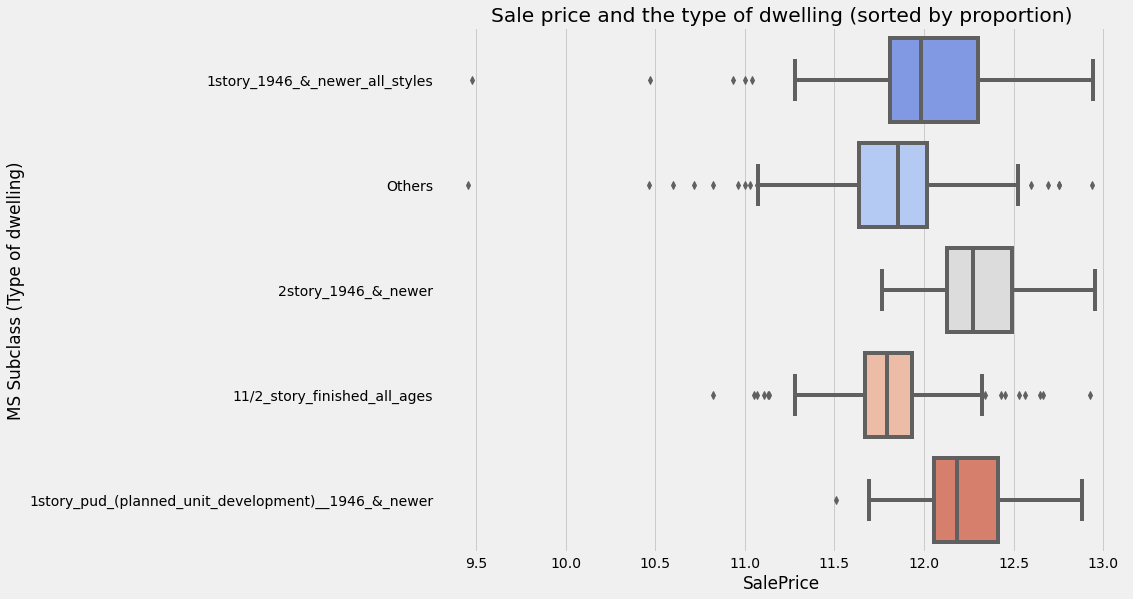

In [349]:
# ms_subclass
plt.figure(figsize=(11,9))
sns.boxplot(x='saleprice',y='ms_subclass',data=clean_train_df_nom, palette='coolwarm', order=dwelling_cleaned_prop)

plt.title('Sale price and the type of dwelling (sorted by proportion)')
plt.xlabel('SalePrice')
plt.ylabel('MS Subclass (Type of dwelling)');

I've decided to keep `ms_subclass` as it's showing that 1946 housing is generally has a median price higher compared to 1945 housing.

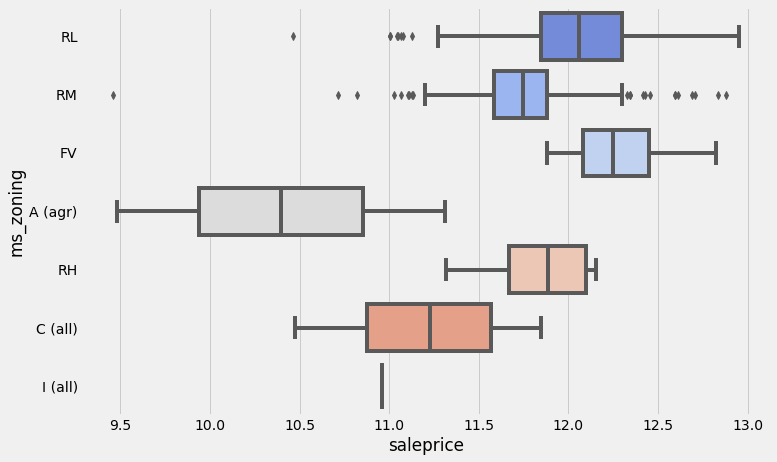

In [350]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='ms_zoning',data=clean_train_df_nom, palette='coolwarm');

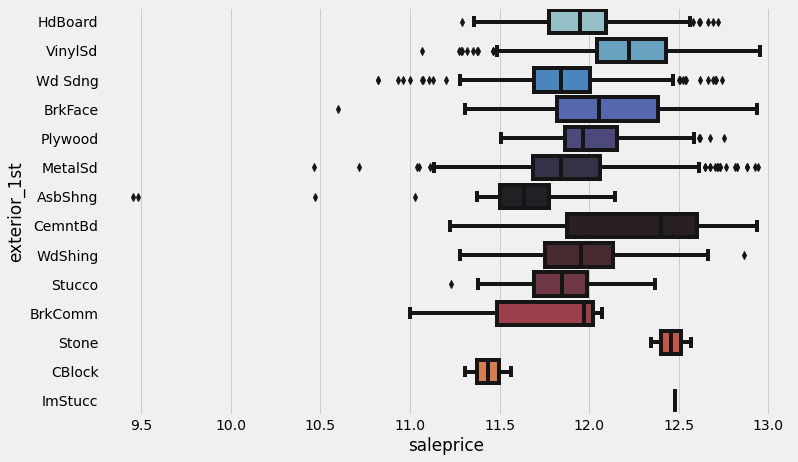

In [351]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='exterior_1st',data=clean_train_df_nom, palette='icefire');

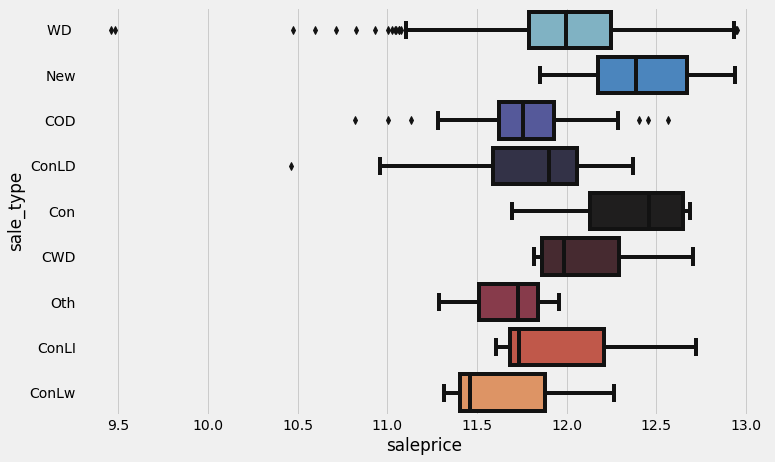

In [352]:
plt.figure(figsize=(11,7))
sns.boxplot(x='saleprice',y='sale_type',data=clean_train_df_nom, palette='icefire');

<Figure size 792x504 with 0 Axes>

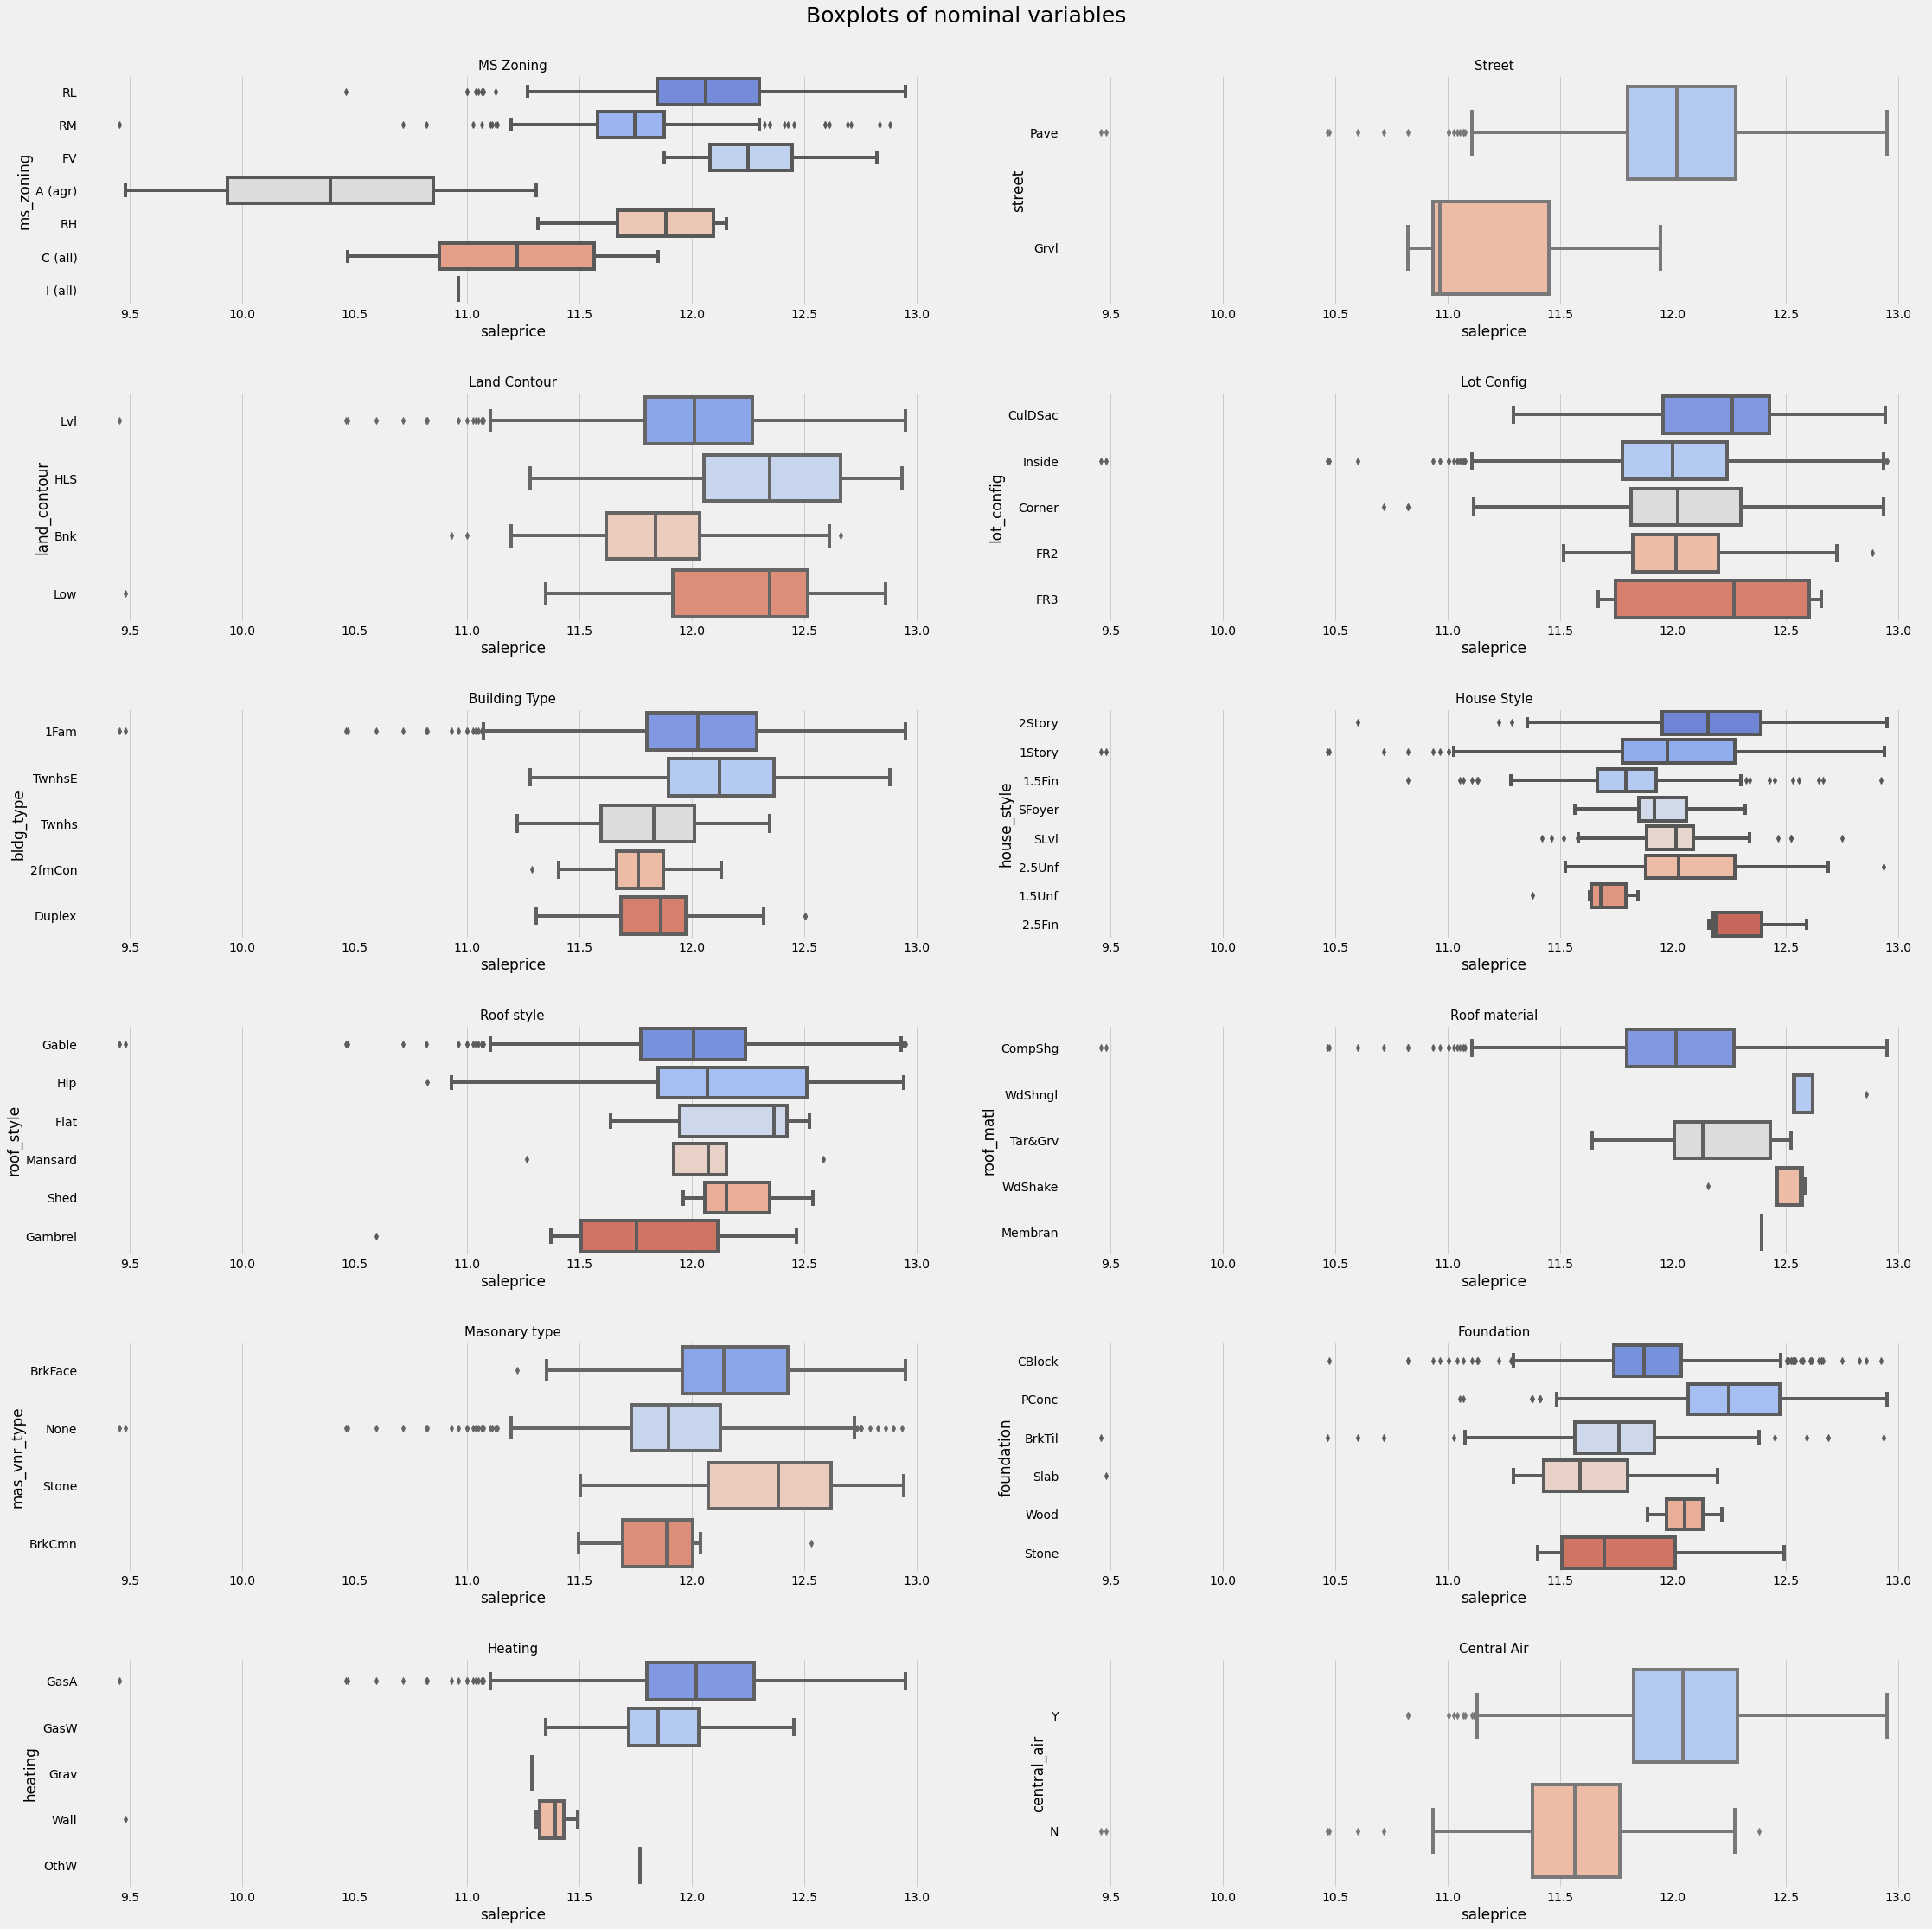

In [353]:
# Creating boxplots of nominal variables
subplot_cat_boxplots(clean_train_df_nom, ['ms_zoning', 'street', 'land_contour', 'lot_config', 'bldg_type',
                                          'house_style', 'roof_style', 'roof_matl', 'mas_vnr_type', 'foundation', 'heating', 'central_air'],
                     ['MS Zoning', 'Street', 'Land Contour', 'Lot Config', 'Building Type', 'House Style', 'Roof style', 
                      'Roof material','Masonary type', 'Foundation', 'Heating', 'Central Air'], sup_title='Boxplots of nominal variables')

The following features I would keep/drop for nominal variables:

`ms_subclass`: Keep `ms_subclass` as it's showing that 1946 housing is generally has a median price higher compared to 1945 housing.

`ms_zoning`: `A`, `FV`, `RH`, `C` would be the features to keep for ms_zoning as they have few outliers in them, and they also seem more consistent compared to other features.

`street`: I would keep all the features of `Street` as they're only 2 features in them.

`land_contour`: I would keep `HLS`, `BNK` and `Low` as they've little outliers

`lot_config`: As `lot_frontage` is kept in the numeric dataframe and `lot_shape` in encoded dataframe, I'll drop `lot_config` as it may introduce biasness in the model given the Multicollinearity. **(Drop)**

`neighborhood`: I've decided to keep `CollgCr`, `Somerst`, `Gilbert` and `Others` as their median price is much higher compared to other neighborhoods.

`condition_1` and `condition_2`: As they seem spread apart, I'll drop them **(Drop)**

`bldg_type`: Drop only `1Fam` as it contains a lot of outliers.

`house_style`: Drop as the variance between it high **(Drop)**

`roof_style`: Drop only `Gable` as it contains a lot of outliers.

`roof_matl`: Drop as the variance between it high **(Drop)**

`exterior_1st` and `exterior_2nd`: Drop both as the variance between it high. **(Drop)**

`mas_vnr_type`: Drop `None` as it has a lots of outliers

`foundation`: Drop as most median prices are low **(Drop)**

`heating`: Drop as `GasA` is the dominant feature and the spread is too high **(Drop)**

`central_air`: Keep both as there only 2 features

`garage_type`: Drop as `garage_qual` and `garage_area` are in the other 2 dataframes and would cause Multicollinearity between the features. **(Drop)**

`sale_type`: Would only drop `WD` as it contains the most outliers.

In [354]:
# Drop lot_config, condition_1 and condition_2, house_style, roof_matl, exterior_1st and exterior_2nd, foundation, heating, garage_type, saleprice
clean_train_df_nom.drop(['lot_config', 'condition_1', 'condition_2', 
                         'house_style', 'roof_matl', 'exterior_1st', 'exterior_2nd', 'foundation', 'heating', 'saleprice'], axis=1, inplace=True)

In [355]:
clean_train_df_nom_dummies = pd.get_dummies(clean_train_df_nom)


In [356]:
# Search for dummies
clean_train_df_nom_dummies.columns[clean_train_df_nom_dummies.columns.str.contains('sale_type')]

Index(['sale_type_COD', 'sale_type_CWD', 'sale_type_Con', 'sale_type_ConLD',
       'sale_type_ConLI', 'sale_type_ConLw', 'sale_type_New', 'sale_type_Oth',
       'sale_type_WD '],
      dtype='object')

In [357]:
# Drop the dummy columns
drop_dummies = [
    'ms_zoning_I (all)',
    'ms_zoning_RL',
    'ms_zoning_RM',
    'land_contour_Lvl',
    'neighborhood_Edwards',
    'neighborhood_NAmes',
    'neighborhood_OldTown',
    'neighborhood_Somerst',
    'bldg_type_1Fam',
    'roof_style_Gable',
    'mas_vnr_type_None',
    'sale_type_WD '
]
clean_train_df_nom_dummies.drop(drop_dummies, axis=1, inplace=True)

In [358]:
clean_train_df_nom_dummies.shape

(1900, 45)

In [359]:
clean_train_df_ord_encoded.shape

(1900, 6)

# Merge Dataframes

Join the train_df_num, train_df_cat_nom, train_df_cat_ord dataframes and assigned this to final_train_df.

In [360]:
# Check for nul values
clean_train_df_nom_dummies.isnull().sum().sum()

0

In [361]:
num_cols = ['lot_frontage',
            'year_remod/add',
            'mas_vnr_area',
            'bsmtfin_sf_1',
            'total_bsmt_sf',
            '1st_flr_sf',
            'gr_liv_area',
            'bsmt_full_bath',
            'full_bath',
            'totrms_abvgrd',
            'fireplaces',
            'garage_area',
            'wood_deck_sf',
            'open_porch_sf',
           'house_age',
           'garage_cars*garage_yr_blt']
clean_train_df_num = clean_train_df[num_cols].copy()
clean_train_df_num.shape

(1900, 16)

In [362]:
# Merge the dataframes
final_train_df = pd.concat([clean_train_df_num, clean_train_df_nom_dummies, clean_train_df_ord_encoded], axis=1)
final_train_df

,lot_frontage,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,house_age,garage_cars*garage_yr_blt,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_2story_1946_&_newer,ms_subclass_Others,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,neighborhood_CollgCr,neighborhood_Gilbert,neighborhood_Others,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,lot_shape,exter_qual,bsmt_cond,heating_qc,garage_qual,garage_cond
0,69.06,2005,289.0,533.0,725.0,725.0,1479.0,0,2,6,0,475.0,0.0,44.0,34,3952,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,3.0,4.0,2.0,2.0
1,43.00,1997,132.0,637.0,913.0,913.0,2122.0,1,2,8,1,559.0,0.0,74.0,13,3994,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,3.0,4.0,2.0,2.0
2,68.00,2007,0.0,731.0,1057.0,1057.0,1057.0,1,1,5,0,246.0,0.0,52.0,57,1953,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,3.0,2.0,2.0,2.0
3,73.00,2007,0.0,0.0,384.0,744.0,1444.0,0,2,7,0,400.0,100.0,0.0,4,4014,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0,3.0,3.0,2.0,2.0
4,82.00,1993,0.0,0.0,676.0,831.0,1445.0,0,2,6,0,484.0,0.0,59.0,110,3914,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,4.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,79.00,2007,0.0,1011.0,1884.0,1728.0,1728.0,1,2,7,1,520.0,0.0,276.0,1,4014,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,3.0,4.0,2.0,2.0
1896,69.06,1950,0.0,262.0,861.0,861.0,861.0,0,1,4,0,539.0,158.0,0.0,69,3922,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,3.0,4.0,2.0,2.0
1897,57.00,1950,0.0,0.0,896.0,1172.0,1913.0,0,1,9,1,342.0,0.0,0.0,81,3858,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,3.0,3.0,1.0,1.0
1898,80.00,1956,0.0,155.0,1200.0,1200.0,1200.0,1,1,6,2,294.0,0.0,189.0,53,1956,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,3.0,2.0,2.0,2.0


In [363]:
# Checking for null values
final_train_df.isnull().sum().sum()

0

In [364]:
# Checking if there are any SalePrice in the column
final_train_df.columns.str.contains('saleprice').sum()

0

In [365]:
# No duplicated columns
final_train_df.columns.duplicated().sum()

0

In [366]:
final_train_df.head()

,lot_frontage,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,house_age,garage_cars*garage_yr_blt,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_2story_1946_&_newer,ms_subclass_Others,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,neighborhood_CollgCr,neighborhood_Gilbert,neighborhood_Others,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,lot_shape,exter_qual,bsmt_cond,heating_qc,garage_qual,garage_cond
0,69.06,2005,289.0,533.0,725.0,725.0,1479.0,0,2,6,0,475.0,0.0,44.0,34,3952,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,3.0,4.0,2.0,2.0
1,43.00,1997,132.0,637.0,913.0,913.0,2122.0,1,2,8,1,559.0,0.0,74.0,13,3994,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,3.0,4.0,2.0,2.0
2,68.00,2007,0.0,731.0,1057.0,1057.0,1057.0,1,1,5,0,246.0,0.0,52.0,57,1953,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,1.0,3.0,2.0,2.0,2.0
3,73.00,2007,0.0,0.0,384.0,744.0,1444.0,0,2,7,0,400.0,100.0,0.0,4,4014,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0,3.0,3.0,2.0,2.0
4,82.00,1993,0.0,0.0,676.0,831.0,1445.0,0,2,6,0,484.0,0.0,59.0,110,3914,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0,1.0,4.0,2.0,2.0,2.0


In [367]:
# Save the final cleaned data frame to csv format
final_train_df.to_csv('../datasets/final_train_df.csv', index=False)

# Preprocessing  

In [368]:
# Standardize the values for final_train_df
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_train_df_scaled = scaler.fit_transform(final_train_df)
final_train_df_scaled= pd.DataFrame(final_train_df_scaled, columns=final_train_df.columns.tolist())
final_train_df_scaled.head()

,lot_frontage,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,house_age,garage_cars*garage_yr_blt,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_2story_1946_&_newer,ms_subclass_Others,ms_zoning_A (agr),ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,neighborhood_CollgCr,neighborhood_Gilbert,neighborhood_Others,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,lot_shape,exter_qual,bsmt_cond,heating_qc,garage_qual,garage_cond
0,0.001802,0.988464,1.182322,0.221705,-0.815709,-1.216694,-0.028346,-0.832282,0.784675,-0.272616,-0.957710,-0.106762,-0.742619,-0.045782,-0.029868,0.201714,-0.326468,-0.786383,-0.273241,2.0,-0.580592,-0.032461,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,-0.254995,1.028837,-0.12666,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,1.463043,-0.294884,-0.231947,0.231947,-0.100504,0.774162,-0.120064,-0.261947,-0.07631,-0.624424,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,1.039441,1.049600,0.099196,0.865150,0.14326,0.109011
1,-1.278750,0.603058,0.217990,0.466349,-0.347349,-0.688058,1.380314,1.115176,0.784675,1.106797,0.621846,0.358536,-0.742619,0.420965,-0.750385,0.234262,-0.326468,-0.786383,-0.273241,2.0,-0.580592,-0.032461,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,-0.254995,1.028837,-0.12666,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,1.463043,-0.294884,-0.231947,0.231947,-0.100504,0.774162,-0.120064,-0.261947,-0.07631,-0.624424,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,1.039441,1.049600,0.099196,0.865150,0.14326,0.109011
2,-0.050285,1.084815,-0.592785,0.687469,0.011396,-0.283145,-0.952848,1.115176,-1.067353,-0.962322,-0.957710,-1.375252,-0.742619,0.078684,0.759269,-1.347421,-0.326468,1.271645,-0.273241,-0.5,-0.580592,-0.032461,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,-0.254995,-0.971972,-0.12666,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,-0.683507,-0.294884,-0.231947,0.231947,-0.100504,-1.291720,-0.120064,-0.261947,-0.07631,1.601477,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,-0.725472,-0.727797,0.099196,-1.232853,0.14326,0.109011
3,0.195408,1.084815,-0.592785,-1.032095,-1.665235,-1.163268,-0.105023,-0.832282,0.784675,0.417091,-0.957710,-0.522206,0.037598,-0.730344,-1.059178,0.249761,-0.326468,-0.786383,-0.273241,2.0,-0.580592,-0.032461,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,-0.254995,1.028837,-0.12666,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,-0.683507,-0.294884,-0.231947,0.231947,-0.100504,-1.291720,-0.120064,3.817561,-0.07631,-0.624424,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,-0.725472,-0.727797,0.099196,-0.183851,0.14326,0.109011
4,0.637656,0.410356,-0.592785,-1.032095,-0.937782,-0.918633,-0.102832,-0.832282,0.784675,-0.272616,-0.957710,-0.056909,-0.742619,0.187591,2.577716,0.172266,3.063089,-0.786383,-0.273241,-0.5,-0.580592,-0.032461,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,

In [369]:
# Save the final cleaned data frame to csv format
final_train_df_scaled.to_csv('../datasets/final_train_df_scaled.csv', index=False)

# Importing and transforming the test dataframe

In [ ]:
# Import test data set
# Open the training set CSV data files
test_df = pd.read_csv('../datasets/test.csv')
test_df.head()

In [371]:
test_df.shape

(879, 80)

In [372]:
# Lower case and add under scores for the columns
test_df.rename(columns=add_underscore_char(test_df.columns), inplace=True)
test_df

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,PosN,Norm,1Fam,2Story,6,6,1974,1974,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,931,LwQ,153,0,1084,GasA,TA,Y,SBrkr,1084,793,0,1877,1,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1974.0,Unf,2,488,TA,TA,Y,0,96,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD
875,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,2Story,6,7,1966,1999,Gable,CompShg,VinylSd,VinylSd,BrkFace,410.0,Gd,Gd,CBlock,TA,TA,No,BLQ,575,Unf,0,529,1104,GasA,Ex,Y,SBrkr,1104,884,0,1988,0,0,2,1,4,1,Gd,9,Typ,1,Gd,Attchd,1966.0,RFn,2,480,TA,TA,Y,0,230,0,0,0,0,NaN,MnPrv,NaN,0,8,2008,WD
876,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,250,LwQ,492,210,952,GasA,Ex,Y,SBrkr,1211,0,0,1211,0,0,1,0,3,1,TA,5,Typ,1,TA,Attchd,1968.0,Unf,1,322,TA,TA,Y,0,63,0,0,0,0,NaN,NaN,NaN,0,8,2008,WD
877,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PCo

In [373]:
# Getting the required columns for each dataframe
test_df_num_col = ['lot_frontage',
                   'year_remod/add',
                   'mas_vnr_area',
                   'bsmtfin_sf_1',
                   'total_bsmt_sf',
                   '1st_flr_sf',
                   'gr_liv_area',
                   'bsmt_full_bath',
                   'full_bath',
                   'totrms_abvgrd',
                   'fireplaces',
                   'garage_area',
                   'wood_deck_sf',
                   'open_porch_sf',
                  'year_built',
                  'yr_sold',
                  'garage_cars',
                  'garage_yr_blt']

test_df_ord_col = ['lot_shape',
                   'kitchen_qual',
                   'bsmt_cond',
                   'heating_qc',
                   'garage_qual',
                   'garage_cond']

test_df_nom_col = ['ms_subclass',
                   'ms_zoning',
                   'street',
                   'land_contour',
                   'neighborhood',
                   'bldg_type',
                   'roof_style',
                   'mas_vnr_type',
                   'central_air',
                   'garage_type',
                   'sale_type']

In [374]:
# Getting the numeric, ordinal and nominal dataframes for test_df
test_df_num = test_df[test_df_num_col].copy()
test_df_ord = test_df[test_df_ord_col].copy()
test_df_nom = test_df[test_df_nom_col].copy()

In [375]:
# Shape of each test dataframes
print("test_df_num shape: ",test_df_num.shape)
print("test_df_ord shape: ",test_df_ord.shape)
print("test_df_nom shape: ",test_df_nom.shape)

test_df_num shape:  (879, 18)
test_df_ord shape:  (879, 6)
test_df_nom shape:  (879, 11)


In [376]:
test_df_num.head()

,lot_frontage,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,year_built,yr_sold,garage_cars,garage_yr_blt
0,69.0,1950,0.0,0,1020,908,1928,0,2,9,0,440,0,60,1910,2006,1,1910.0
1,NaN,1977,0.0,0,1967,1967,1967,0,2,10,0,580,170,0,1977,2006,2,1977.0
2,58.0,2006,0.0,554,654,664,1496,1,2,7,1,426,100,24,2006,2006,2,2006.0
3,60.0,2006,0.0,0,968,968,968,0,1,5,0,480,0,0,1923,2007,2,1935.0
4,NaN,1963,247.0,609,1394,1394,1394,1,1,6,2,514,0,76,1963,2009,2,1963.0


In [377]:
# Add back the house_age
test_df_num['house_age'] = test_df_num['yr_sold'] - test_df_num['year_built']
test_df_num.drop(['yr_sold','year_built'], axis=1, inplace=True)
test_df_num['house_age']

0      96
1      29
2       0
3      84
4      46
       ..
874    33
875    42
876    40
877    36
878    52
Name: house_age, Length: 879, dtype: int64

In [378]:
# garage_yr_blt has NA values that make up 5% of the test_df_num, I'll fill them up with the median values
test_df_num['garage_yr_blt'].isnull().sum()  / len(test_df_num) * 100

5.1194539249146755

> <font size = 3 color = "crimson"> If you are using mean/mode/median to impute missing values, always use the mean/mode/median from the training set. </font>

In [379]:
# Fill in the missing Numeric variables for 'garage_yr_blt'
median_values = {'garage_yr_blt':test_df_num['garage_yr_blt'].median()}
median_values

test_df_num = test_df_num.fillna(median_values) # Fill the nulls values of the test_df_num with the mean values
test_df_num.isnull().sum().sort_values(ascending=False)

lot_frontage      160
mas_vnr_area        1
bsmt_full_bath      0
year_remod/add      0
bsmtfin_sf_1        0
total_bsmt_sf       0
1st_flr_sf          0
gr_liv_area         0
house_age           0
garage_yr_blt       0
totrms_abvgrd       0
fireplaces          0
garage_area         0
wood_deck_sf        0
open_porch_sf       0
garage_cars         0
full_bath           0
dtype: int64

In [380]:
# Fill in the missing Numeric variables for 'lot_frontage','mas_vnr_area'
mean_values = dict(round(test_df_num[['lot_frontage','mas_vnr_area']].mean(),2)) 
mean_values

test_df_num = test_df_num.fillna(mean_values) # Fill the nulls values of the test_df_num with the mean values
test_df_num.isnull().sum().sort_values(ascending=False)

house_age         0
bsmt_full_bath    0
year_remod/add    0
mas_vnr_area      0
bsmtfin_sf_1      0
total_bsmt_sf     0
1st_flr_sf        0
gr_liv_area       0
full_bath         0
garage_yr_blt     0
totrms_abvgrd     0
fireplaces        0
garage_area       0
wood_deck_sf      0
open_porch_sf     0
garage_cars       0
lot_frontage      0
dtype: int64

In [381]:
# Add back the feature engineered garage_cars*garage_yr_blt'
test_df_num['garage_cars*garage_yr_blt'] = test_df_num['garage_cars'] * test_df_num['garage_yr_blt']
test_df_num.drop(['garage_cars', 'garage_yr_blt'], axis=1, inplace=True)

In [383]:
# Check for null values
test_df_num.isnull().sum()

lot_frontage                 0
year_remod/add               0
mas_vnr_area                 0
bsmtfin_sf_1                 0
total_bsmt_sf                0
1st_flr_sf                   0
gr_liv_area                  0
bsmt_full_bath               0
full_bath                    0
totrms_abvgrd                0
fireplaces                   0
garage_area                  0
wood_deck_sf                 0
open_porch_sf                0
house_age                    0
garage_cars*garage_yr_blt    0
dtype: int64

In [384]:
# Ordinal Variables
# Replace the NaN values with None string for ordinal encoding
test_df_ord.fillna('None', inplace=True)

In [385]:
# Nominal Variables
# Fill the NaN values with 'None'
test_df_nom.fillna('None',inplace=True)

In [386]:
# Shape of each test dataframes
print("test_df_num shape: ",test_df_num.shape)
print("test_df_ord shape: ",test_df_ord.shape)
print("test_df_nom shape: ",test_df_nom.shape)

test_df_num shape:  (879, 16)
test_df_ord shape:  (879, 6)
test_df_nom shape:  (879, 11)


In [387]:
# Checking for null values
print("test_df_num null: ",test_df_num.isnull().sum().sum())
print("test_df_ord null: ",test_df_ord.isnull().sum().sum())
print("test_df_nom null: ",test_df_nom.isnull().sum().sum())

test_df_num null:  0
test_df_ord null:  0
test_df_nom null:  0


In [388]:
# Need to map the values MS SubClass to their categories
test_df_nom['ms_subclass'] = test_df_nom['ms_subclass'].map({
    20: '1-STORY 1946 & NEWER ALL STYLES',
    30: '1-STORY 1945 & OLDER',
    40: '1-STORY W/FINISHED ATTIC ALL AGES',
    45: '-1/2 STORY - UNFINISHED ALL AGES',
    50: '1-1/2 STORY FINISHED ALL AGES',
    60: '2-STORY 1946 & NEWER',
    70: '2-STORY 1945 & OLDER',
    75: '2-1/2 STORY ALL AGES',
    80: 'SPLIT OR MULTI-LEVEL',
    85: 'SPLIT FOYER',
    90: 'DUPLEX - ALL STYLES AND AGES',
    120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
    150: '1-1/2 STORY PUD - ALL AGES',
    160: '2-STORY PUD - 1946 & NEWER',
    180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
    190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

# Converting the values to lower case and added underscores to replace the space later for one hot encoding
test_df_nom['ms_subclass'] = test_df_nom['ms_subclass'].map(
    lambda x: x.lower().replace(' ', '_').replace('-', ''))

In [389]:
test_df_nom['ms_subclass'].value_counts()

1story_1946_&_newer_all_styles                         309
2story_1946_&_newer                                    181
11/2_story_finished_all_ages                            89
1story_pud_(planned_unit_development)__1946_&_newer     60
2story_pud__1946_&_newer                                41
2story_1945_&_older                                     38
1story_1945_&_older                                     38
duplex__all_styles_and_ages                             34
split_or_multilevel                                     32
split_foyer                                             20
2_family_conversion__all_styles_and_ages                15
21/2_story_all_ages                                      7
1/2_story__unfinished_all_ages                           7
pud__multilevel__incl_split_lev/foyer                    6
1story_w/finished_attic_all_ages                         2
Name: ms_subclass, dtype: int64

# Preprocessing of the dataframes

## test_df_ord

In [390]:
# Perform ordinal encoding for the test_df_ord to check for correlations

# Create the categories in order
lotshape = ['Reg','IR1','IR2','IR3']
kitchenqual = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
bsmtcond = ['None','Fa', 'TA', 'Gd', 'Ex'] # No PO
heatingqc = ['Fa', 'TA', 'Gd', 'Ex'] # No PO
garagequal = ['None','Po','Fa', 'TA', 'Gd', 'Ex'] # Added None
garagecond = ['None','Po','Fa', 'TA', 'Gd', 'Ex'] # Added None



ordinal_encoder = OrdinalEncoder(categories=[
    lotshape,
    kitchenqual,
    bsmtcond,
    heatingqc,
    garagequal,
    garagecond]) # Fill the categories
test_df_ord_encoded = ordinal_encoder.fit_transform(test_df_ord)  # Fit and transform to the ordinal numerics
test_df_ord_encoded = pd.DataFrame(test_df_ord_encoded, columns=test_df_ord.columns.tolist(), index=test_df_num.index)

In [391]:
test_df_ord_encoded

,lot_shape,kitchen_qual,bsmt_cond,heating_qc,garage_qual,garage_cond
0,0.0,1.0,2.0,2.0,1.0,1.0
1,1.0,2.0,2.0,1.0,3.0,3.0
2,1.0,3.0,3.0,3.0,3.0,3.0
3,0.0,2.0,2.0,1.0,2.0,3.0
4,1.0,2.0,2.0,2.0,3.0,3.0
...,...,...,...,...,...,...
874,0.0,2.0,2.0,1.0,3.0,3.0
875,0.0,3.0,2.0,3.0,3.0,3.0
876,0.0,2.0,2.0,3.0,3.0,3.0
877,0.0,2.0,2.0,1.0,3.0,3.0


## test_df_nom

In [392]:
test_df_nom.head()

,ms_subclass,ms_zoning,street,land_contour,neighborhood,bldg_type,roof_style,mas_vnr_type,central_air,garage_type,sale_type
0,2_family_conversion__all_styles_and_ages,RM,Pave,Lvl,OldTown,2fmCon,Gable,None,N,Detchd,WD
1,duplex__all_styles_and_ages,RL,Pave,Lvl,Sawyer,Duplex,Gable,None,Y,Attchd,WD
2,2story_1946_&_newer,RL,Pave,Lvl,Gilbert,1Fam,Gable,None,Y,Attchd,New
3,1story_1945_&_older,RM,Pave,Lvl,OldTown,1Fam,Gable,None,Y,Detchd,WD
4,1story_1946_&_newer_all_styles,RL,Pave,Lvl,NAmes,1Fam,Gable,BrkFace,Y,Attchd,WD


In [393]:
# Group up lesser known neighborhoods into "others" with a proportion less than 0.057
replace_with_other = test_df_nom['neighborhood'].value_counts(normalize=True)[
    test_df_nom['neighborhood'].value_counts(normalize=True) <= 0.057].index.tolist()
replace_with_other

['Gilbert',
 'NWAmes',
 'NridgHt',
 'Sawyer',
 'SawyerW',
 'BrkSide',
 'Crawfor',
 'Mitchel',
 'Timber',
 'IDOTRR',
 'NoRidge',
 'ClearCr',
 'SWISU',
 'MeadowV',
 'StoneBr',
 'BrDale',
 'Veenker',
 'NPkVill',
 'Blmngtn',
 'Greens',
 'Blueste']

In [394]:
# Group the lower priced neighborhood with 'others'
test_df_nom['neighborhood'] = test_df_nom['neighborhood'].map(lambda x:x.replace(x,'Others') if x in replace_with_other else x)

In [395]:
test_df_nom['neighborhood'].value_counts(normalize=True)

Others     0.546075
NAmes      0.151308
CollgCr    0.098976
OldTown    0.086462
Somerst    0.059158
Edwards    0.058020
Name: neighborhood, dtype: float64

In [396]:
# ms_subclass: Dwelling less than 5
dwelling_less_than_5 = test_df_nom['ms_subclass'].value_counts(normalize=True)[test_df_nom['ms_subclass'].value_counts(normalize=True) < 0.05].index

In [397]:
# ms_subclass: Dwelling less than 5, replace with 'Others'
test_df_nom['ms_subclass'] = test_df_nom['ms_subclass'].map(lambda x:x.replace(x,'Others') if x in dwelling_less_than_5 else x)

In [398]:
test_df_nom['ms_subclass'].value_counts(normalize=True)

1story_1946_&_newer_all_styles                         0.351536
Others                                                 0.273038
2story_1946_&_newer                                    0.205916
11/2_story_finished_all_ages                           0.101251
1story_pud_(planned_unit_development)__1946_&_newer    0.068259
Name: ms_subclass, dtype: float64

In [399]:
test_df_nom_dummies = pd.get_dummies(test_df_nom, columns=test_df_nom.columns)
test_df_nom_dummies

,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_2story_1946_&_newer,ms_subclass_Others,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,land_contour_Lvl,neighborhood_CollgCr,neighborhood_Edwards,neighborhood_NAmes,neighborhood_OldTown,neighborhood_Others,neighborhood_Somerst,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_CBlock,mas_vnr_type_None,mas_vnr_type_Stone,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_None,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_VWD,sale_type_WD
0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
875,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
876,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
877,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [400]:
# Getting only the common columns present in clean_train_df_nom_dummies and test_df_nom_dummies
dummies_cols = sorted([item for item in test_df_nom_dummies if item in clean_train_df_nom_dummies])
dummies_cols

['bldg_type_2fmCon',
 'bldg_type_Duplex',
 'bldg_type_Twnhs',
 'bldg_type_TwnhsE',
 'central_air_N',
 'central_air_Y',
 'garage_type_2Types',
 'garage_type_Attchd',
 'garage_type_Basment',
 'garage_type_BuiltIn',
 'garage_type_CarPort',
 'garage_type_Detchd',
 'land_contour_Bnk',
 'land_contour_HLS',
 'land_contour_Low',
 'mas_vnr_type_BrkCmn',
 'mas_vnr_type_BrkFace',
 'mas_vnr_type_Stone',
 'ms_subclass_11/2_story_finished_all_ages',
 'ms_subclass_1story_1946_&_newer_all_styles',
 'ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer',
 'ms_subclass_2story_1946_&_newer',
 'ms_subclass_Others',
 'ms_zoning_C (all)',
 'ms_zoning_FV',
 'ms_zoning_RH',
 'neighborhood_CollgCr',
 'neighborhood_Others',
 'roof_style_Flat',
 'roof_style_Gambrel',
 'roof_style_Hip',
 'roof_style_Mansard',
 'roof_style_Shed',
 'sale_type_COD',
 'sale_type_CWD',
 'sale_type_Con',
 'sale_type_ConLD',
 'sale_type_ConLI',
 'sale_type_ConLw',
 'sale_type_New',
 'sale_type_Oth',
 'street_Grvl',
 'street_P

In [401]:
test_df_nom_dummies = test_df_nom_dummies[dummies_cols]
test_df_nom_dummies.columns

Index(['bldg_type_2fmCon', 'bldg_type_Duplex', 'bldg_type_Twnhs',
       'bldg_type_TwnhsE', 'central_air_N', 'central_air_Y',
       'garage_type_2Types', 'garage_type_Attchd', 'garage_type_Basment',
       'garage_type_BuiltIn', 'garage_type_CarPort', 'garage_type_Detchd',
       'land_contour_Bnk', 'land_contour_HLS', 'land_contour_Low',
       'mas_vnr_type_BrkCmn', 'mas_vnr_type_BrkFace', 'mas_vnr_type_Stone',
       'ms_subclass_11/2_story_finished_all_ages',
       'ms_subclass_1story_1946_&_newer_all_styles',
       'ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer',
       'ms_subclass_2story_1946_&_newer', 'ms_subclass_Others',
       'ms_zoning_C (all)', 'ms_zoning_FV', 'ms_zoning_RH',
       'neighborhood_CollgCr', 'neighborhood_Others', 'roof_style_Flat',
       'roof_style_Gambrel', 'roof_style_Hip', 'roof_style_Mansard',
       'roof_style_Shed', 'sale_type_COD', 'sale_type_CWD', 'sale_type_Con',
       'sale_type_ConLD', 'sale_type_ConLI', 'sale_type_ConL

## Combining the test dataframes together

In [402]:
# Shape of each test data frame
print('test_df_num: ', test_df_num.shape)
print('test_df_ord_encoded: ', test_df_ord_encoded.shape)
print('test_df_nom_dummies: ', test_df_nom_dummies.shape)

test_df_num:  (879, 16)
test_df_ord_encoded:  (879, 6)
test_df_nom_dummies:  (879, 43)


In [403]:
# Checking for null values
print("test_df_num nulls: ",test_df_num.isnull().sum().sum())
print("test_df_ord nulls: ",test_df_ord_encoded.isnull().sum().sum())
print("test_df_nom nulls: ",test_df_nom_dummies.isnull().sum().sum())

test_df_num nulls:  0
test_df_ord nulls:  0
test_df_nom nulls:  0


In [404]:
final_test_df = pd.concat([test_df_num, test_df_nom_dummies, test_df_ord_encoded], axis=1)
final_test_df.head()

,lot_frontage,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,house_age,garage_cars*garage_yr_blt,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,land_contour_Bnk,land_contour_HLS,land_contour_Low,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_2story_1946_&_newer,ms_subclass_Others,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,neighborhood_CollgCr,neighborhood_Others,roof_style_Flat,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,street_Grvl,street_Pave,lot_shape,kitchen_qual,bsmt_cond,heating_qc,garage_qual,garage_cond
0,69.00,1950,0.0,0,1020,908,1928,0,2,9,0,440,0,60,96,1910.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1.0,2.0,2.0,1.0,1.0
1,69.63,1977,0.0,0,1967,1967,1967,0,2,10,0,580,170,0,29,3954.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,2.0,2.0,1.0,3.0,3.0
2,58.00,2006,0.0,554,654,664,1496,1,2,7,1,426,100,24,0,4012.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1.0,3.0,3.0,3.0,3.0,3.0
3,60.00,2006,0.0,0,968,968,968,0,1,5,0,480,0,0,84,3870.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,2.0,2.0,1.0,2.0,3.0
4,69.63,1963,247.0,609,1394,1394,1394,1,1,6,2,514,0,76,46,3926.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,2.0,2.0,2.0,3.0,3.0


In [405]:
# Checking for null values
final_test_df.isnull().sum().sum()

0

In [406]:
# No duplicated columns
final_test_df.columns.duplicated().sum()

0

In [407]:
final_test_df.shape

(879, 65)

In [408]:
final_train_df.shape

(1900, 67)

In [409]:
# 'neighborhood_Gilbert', 'ms_zoning_A (agr)', 'exter_qual' is not found in final_test_df, will drop as these 3 columns to be consistent with the test set
list(set(final_train_df.columns).difference(final_test_df.columns))

['neighborhood_Gilbert', 'exter_qual', 'ms_zoning_A (agr)']

In [410]:
# Drop ['neighborhood_Gilbert''ms_zoning_A (agr)', 'exter_qual'] from columns
final_train_df.drop(['neighborhood_Gilbert','ms_zoning_A (agr)', 'exter_qual'], axis=1, inplace=True)

In [411]:
# Scaling the final_train_df_scaled with Standard Scaler
scaler = StandardScaler()
final_train_df_scaled = scaler.fit_transform(final_train_df)
final_train_df_scaled= pd.DataFrame(final_train_df_scaled, columns=final_train_df.columns.tolist())
final_train_df_scaled.head()

,lot_frontage,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,house_age,garage_cars*garage_yr_blt,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_2story_1946_&_newer,ms_subclass_Others,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,neighborhood_CollgCr,neighborhood_Others,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,lot_shape,bsmt_cond,heating_qc,garage_qual,garage_cond
0,0.001802,0.988464,1.182322,0.221705,-0.815709,-1.216694,-0.028346,-0.832282,0.784675,-0.272616,-0.957710,-0.106762,-0.742619,-0.045782,-0.029868,0.201714,-0.326468,-0.786383,-0.273241,2.0,-0.580592,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,1.028837,-0.12666,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,1.463043,-0.294884,-0.231947,0.231947,-0.100504,0.774162,-0.120064,-0.261947,-0.07631,-0.624424,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,1.039441,0.099196,0.865150,0.14326,0.109011
1,-1.278750,0.603058,0.217990,0.466349,-0.347349,-0.688058,1.380314,1.115176,0.784675,1.106797,0.621846,0.358536,-0.742619,0.420965,-0.750385,0.234262,-0.326468,-0.786383,-0.273241,2.0,-0.580592,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,1.028837,-0.12666,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,1.463043,-0.294884,-0.231947,0.231947,-0.100504,0.774162,-0.120064,-0.261947,-0.07631,-0.624424,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,1.039441,0.099196,0.865150,0.14326,0.109011
2,-0.050285,1.084815,-0.592785,0.687469,0.011396,-0.283145,-0.952848,1.115176,-1.067353,-0.962322,-0.957710,-1.375252,-0.742619,0.078684,0.759269,-1.347421,-0.326468,1.271645,-0.273241,-0.5,-0.580592,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,-0.971972,-0.12666,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,-0.683507,-0.294884,-0.231947,0.231947,-0.100504,-1.291720,-0.120064,-0.261947,-0.07631,1.601477,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,-0.725472,0.099196,-1.232853,0.14326,0.109011
3,0.195408,1.084815,-0.592785,-1.032095,-1.665235,-1.163268,-0.105023,-0.832282,0.784675,0.417091,-0.957710,-0.522206,0.037598,-0.730344,-1.059178,0.249761,-0.326468,-0.786383,-0.273241,2.0,-0.580592,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,1.028837,-0.12666,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,-0.683507,-0.294884,-0.231947,0.231947,-0.100504,-1.291720,-0.120064,3.817561,-0.07631,-0.624424,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,-0.725472,0.099196,-0.183851,0.14326,0.109011
4,0.637656,0.410356,-0.592785,-1.032095,-0.937782,-0.918633,-0.102832,-0.832282,0.784675,-0.272616,-0.957710,-0.056909,-0.742619,0.187591,2.577716,0.172266,3.063089,-0.786383,-0.273241,-0.5,-0.580592,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,1.028837,-0.12666,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,-0.683507,-0.294884,-0.231947,0.231947,-0.100504,-1.

In [412]:
# Set the final_test_df columns to be in the same order with final_train_df
final_test_df = final_test_df[final_train_df.columns]
final_test_df

,lot_frontage,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,house_age,garage_cars*garage_yr_blt,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_2story_1946_&_newer,ms_subclass_Others,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,neighborhood_CollgCr,neighborhood_Others,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,lot_shape,bsmt_cond,heating_qc,garage_qual,garage_cond
0,69.00,1950,0.0,0,1020,908,1928,0,2,9,0,440,0,60,96,1910.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,2.0,2.0,1.0,1.0
1,69.63,1977,0.0,0,1967,1967,1967,0,2,10,0,580,170,0,29,3954.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,1.0,3.0,3.0
2,58.00,2006,0.0,554,654,664,1496,1,2,7,1,426,100,24,0,4012.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1.0,3.0,3.0,3.0,3.0
3,60.00,2006,0.0,0,968,968,968,0,1,5,0,480,0,0,84,3870.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,2.0,1.0,2.0,3.0
4,69.63,1963,247.0,609,1394,1394,1394,1,1,6,2,514,0,76,46,3926.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,2.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,80.00,1974,0.0,931,1084,1084,1877,1,2,8,1,488,0,96,33,3948.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,1.0,3.0,3.0
875,90.00,1999,410.0,575,1104,1104,1988,0,2,9,1,480,0,230,42,3932.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,3.0,3.0,3.0
876,55.00,1968,0.0,250,952,1211,1211,0,1,5,1,322,0,63,40,1968.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2.0,3.0,3.0,3.0
877,60.00,1971,0.0,616,864,864,864,0,1,5,0,528,0,0,36,3948.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,2.0,1.0,3.0,3.0


In [413]:
# Scaling the final_test_df with Standard Scaler
final_test_df_scaled = scaler.transform(final_test_df)
final_test_df_scaled = pd.DataFrame(final_test_df_scaled, columns=final_test_df.columns.tolist())
final_test_df_scaled.head()

,lot_frontage,year_remod/add,mas_vnr_area,bsmtfin_sf_1,total_bsmt_sf,1st_flr_sf,gr_liv_area,bsmt_full_bath,full_bath,totrms_abvgrd,fireplaces,garage_area,wood_deck_sf,open_porch_sf,house_age,garage_cars*garage_yr_blt,ms_subclass_11/2_story_finished_all_ages,ms_subclass_1story_1946_&_newer_all_styles,ms_subclass_1story_pud_(planned_unit_development)__1946_&_newer,ms_subclass_2story_1946_&_newer,ms_subclass_Others,ms_zoning_C (all),ms_zoning_FV,ms_zoning_RH,street_Grvl,street_Pave,land_contour_Bnk,land_contour_HLS,land_contour_Low,neighborhood_CollgCr,neighborhood_Others,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,roof_style_Flat,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,mas_vnr_type_BrkCmn,mas_vnr_type_BrkFace,mas_vnr_type_Stone,central_air_N,central_air_Y,garage_type_2Types,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,sale_type_COD,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,lot_shape,bsmt_cond,heating_qc,garage_qual,garage_cond
0,-0.001146,-1.661200,-0.592785,-1.032095,-0.080782,-0.702117,0.955306,-0.832282,0.784675,1.796503,-0.957710,-0.300636,-0.742619,0.203149,2.097372,-1.380744,-0.326468,-0.786383,-0.273241,-0.5,1.722381,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,-0.971972,7.895146,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,-0.683507,-0.294884,4.311337,-4.311337,-0.100504,-1.291720,-0.120064,-0.261947,-0.07631,1.601477,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,-0.725472,-1.766871,-1.232853,-3.980903,-4.297800
1,0.029811,-0.360456,-0.592785,-1.032095,2.278460,2.275681,1.040746,-0.832282,0.784675,2.486210,-0.957710,0.474860,0.583750,-0.730344,-0.201420,0.203264,-0.326468,-0.786383,-0.273241,-0.5,1.722381,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,1.028837,-0.126660,5.846810,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,-0.683507,-0.294884,-0.231947,0.231947,-0.100504,0.774162,-0.120064,-0.261947,-0.07631,-0.624424,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,1.039441,-1.766871,-2.281855,4.267424,4.515822
2,-0.541671,1.036640,-0.592785,0.271104,-0.992590,-1.388220,0.008897,1.115176,0.784675,0.417091,0.621846,-0.378186,0.037598,-0.356947,-1.196419,0.248212,-0.326468,-0.786383,-0.273241,2.0,-0.580592,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,1.028837,-0.126660,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,-0.683507,-0.294884,-0.231947,0.231947,-0.100504,0.774162,-0.120064,-0.261947,-0.07631,-0.624424,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,3.559363,-0.039767,1.039441,0.099196,-0.183851,4.267424,4.515822
3,-0.443394,1.036640,-0.592785,-1.032095,-0.210328,-0.533403,-1.147825,-0.832282,-1.067353,-0.962322,-0.957710,-0.079066,-0.742619,-0.730344,1.685648,0.138168,-0.326468,-0.786383,-0.273241,-0.5,1.722381,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,-0.971972,-0.126660,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,-0.683507,-0.294884,-0.231947,0.231947,-0.100504,-1.291720,-0.120064,-0.261947,-0.07631,1.601477,-0.183664,-0.072739,-0.045932,-0.086158,-0.051367,-0.051367,-0.280949,-0.039767,-0.725472,-1.766871,-2.281855,0.143260,4.515822
4,0.029811,-1.034916,0.924348,0.400483,0.850957,0.664464,-0.214561,1.115176,-1.067353,-0.272616,2.201402,0.109269,-0.742619,0.452081,0.381856,0.181565,-0.326468,1.271645,-0.273241,-0.5,-0.580592,-0.07631,-0.236944,-0.07631,-0.051367,0.051367,-0.19558,-0.198462,-0.144764,-0.320512,-0.971972,-0.126660,-0.171033,-0.183664,-0.303239,-0.07631,-0.07631,-0.479347,-0.051367,-0.039767,-0.079724,1.463043,-0.294884,-0.231947,0.231947

In [414]:
# Save the final_train_df_scaled final_test_df_scaled to CSV format
final_train_df_scaled.to_csv('../datasets/final_train_df_scaled.csv', index=False)
final_test_df_scaled.to_csv('../datasets/final_test_df_scaled.csv', index=False)